# Installation des packages

In [1]:
!pip install yfinance
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import warnings
import math

# Première séance

Dans cette séance, nous étudions le risque de marché sur les actions.

## Question 1


Parmi les 28 titres du CAC 40, choisir 10 actions au choix et extraire les informations pratiques.

https://fr.finance.yahoo.com/quote/%5EFCHI/components/?guccounter=1&guce_referrer=aHR0cHM6Ly90ZWFtcy5taWNyb3NvZnQuY29tLw&guce_referrer_sig=AQAAAFeAkKNak0KhURK4ZnO70bVxJD9nyU_VDZuHAudbLelLBu4RerXGRtm3a0xri8EePb6M6MjsarYzg0oyit3QDyYrIeqJz4coJG-bLhelg0WohIj_sfZe9YIvzA7JeXnIW-t40d8pagNV_gQW0Mj3XdjlyfRsASlbLSnb4AC-nkWb

Nous calculerons, sur le portefeuille constitué de ces 10 actions, l'AUM (Assets Under Management), la performance en les dates $T_i$ ainsi que la standard deviation annualisée.

---


Nous avons considéré les 10 actions listées dans le code, avec un poids de 0.1 pour chaque action choisie.

Ainsi, l'AUM est simplement la moyenne pondérée des prix de chaque action sur l'historique (sur 2 ans).

Nous calculons ensuite la performance en $T_i$ à l'aide de la formule :
$$ perf(T_i) = \frac{AUM(T_i)}{AUM(T_{i-1})} - 1$$

Enfin, la standard deviation se calcule de la façon suivante :
$$ std.dev = \sum_{i=1}^{n} (perf(T_i) - \overline{perf(T_i)})^2
$$
avec $\overline{perf(T_i)}$ la moyenne des $perf(T_i)$

Nous annualisons ensuite cette volatilité journalière en multipliant par $\sqrt{252}$.

In [2]:
# Liste des symboles boursiers
tickers = [
    "BNP.PA",  # BNP
    "RI.PA",   # Pernod Ricard SA
    "KER.PA",  # Kering SA
    "ML.PA",   # Michelin
    "MC.PA",   # LVMH
    "OR.PA",   # L'Oreal SA
    "SW.PA",   # Sodexo
    "AC.PA",   # Accor
    "HO.PA",   # Thales
    "AI.PA"    # Air Liquide
]

end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Télécharger les données pour chaque ticker et les stocker dans un DataFrame
prices = pd.DataFrame()

for ticker in tickers:
    print(f"Téléchargement des données pour {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True, progress = False)
    if not data.empty:
        prices[ticker] = data["Close"]  # Récupérer uniquement les prix de clôture

# Calculer l'AUM (prix moyen pondéré)
portfolio_aum = prices.mean(axis=1)  # Moyenne pondérée simple (poids égal pour chaque actif)

# Calculer perf(Ti) = AUM(Ti) / AUM(Ti-1) - 1
portfolio_perf = portfolio_aum.pct_change()

# Calculer la standard deviation des performances
std_dev = portfolio_perf.std()  # Ecart-type des performances

std_dev_annualisee = std_dev * np.sqrt(252)


result = pd.DataFrame({
    "AUM": portfolio_aum,
    "Performance": portfolio_perf
})

print("Résultats :")
print(result)
print(f"Performance annualisée : {std_dev_annualisee:.6%}")

Téléchargement des données pour BNP.PA...
Téléchargement des données pour RI.PA...
Téléchargement des données pour KER.PA...
Téléchargement des données pour ML.PA...
Téléchargement des données pour MC.PA...
Téléchargement des données pour OR.PA...
Téléchargement des données pour SW.PA...
Téléchargement des données pour AC.PA...
Téléchargement des données pour HO.PA...
Téléchargement des données pour AI.PA...
Résultats :
                   AUM  Performance
Date                               
2023-03-30  235.869032          NaN
2023-03-31  239.079106     0.013610
2023-04-03  238.937733    -0.000591
2023-04-04  239.173757     0.000988
2023-04-05  237.812784    -0.005690
...                ...          ...
2025-03-24  188.297998    -0.005451
2025-03-25  189.042000     0.003951
2025-03-26  187.739001    -0.006893
2025-03-27  186.842998    -0.004773
2025-03-28  186.277001    -0.003029

[510 rows x 2 columns]
Performance annualisée : 18.650625%


La volatilité annualisée de 18.65% représente l'écart-type des performances quotidiennes du portefeuille, extrapolé sur une année (en supposant 252 jours de bourse). Cette valeur élevée indique que le portefeuille présente une variabilité importante de ses rendements.

---

Analysons plus en détail notre portefeuille :

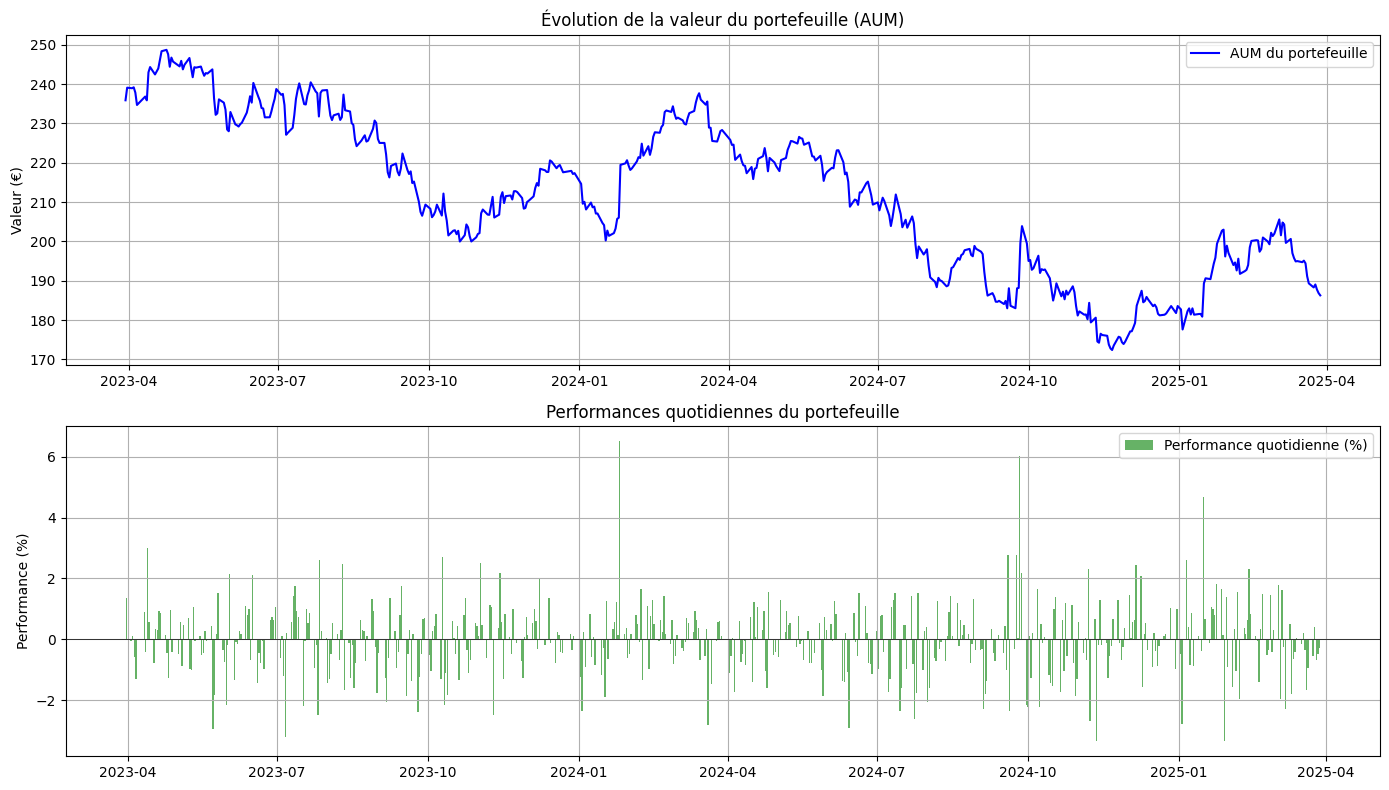

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Graphique 1 : Évolution de l'AUM
plt.subplot(2, 1, 1)
plt.plot(result.index, result['AUM'], label='AUM du portefeuille', color='blue')
plt.title('Évolution de la valeur du portefeuille (AUM)')
plt.ylabel('Valeur (€)')
plt.grid(True)
plt.legend()

# Graphique 2 : Évolution des performances quotidiennes
plt.subplot(2, 1, 2)
plt.bar(result.index, result['Performance']*100, label='Performance quotidienne (%)', color='green', alpha=0.6)
plt.title('Performances quotidiennes du portefeuille')
plt.ylabel('Performance (%)')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Ligne à 0%
plt.legend()
plt.tight_layout()
plt.show()

Nous pouvons voir que le portefeuille a connu des phases de forte volatilité avec des cycles de hausse et de baisse marqués.

La reprise en début 2024 suggère une phase haussière temporaire, suivie d’une volatilité persistante.

La performance quotidienne montre que les rendements sont dispersés avec des variations importantes, ce qui indique une certaine instabilité.

Ainsi, l'évolution du portefeuille suggère une gestion exposée aux fluctuations du marché, avec un risque de volatilité relativement élevé.

## Question 2

Télécharger les prix du CAC 40 sur 2 ans, et calculer la volatilité annuelle.

---

In [4]:
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)  # 2 ans d'historique

# Télécharger les données pour le CAC 40 (^FCHI)
print("Téléchargement des données pour le CAC 40 (^FCHI)...")
cac40_data = yf.download("^FCHI", start=start_date, end=end_date, auto_adjust=True, progress = False)

# Calculer les rendements quotidiens (perf(Ti) = Ti / Ti-1 - 1)
cac40_returns = cac40_data["Close"].pct_change()

# Calculer la volatilité quotidienne (écart-type des rendements)
daily_volatility = cac40_returns.std()

# Calculer la volatilité annualisée (ex-ante)
annualized_volatility = daily_volatility * np.sqrt(252)

print(f"Volatilité quotidienne : {float(daily_volatility.iloc[0]):.6%}")
print(f"Volatilité annualisée (ex-ante) : {float(annualized_volatility.iloc[0]):.6%}")

Téléchargement des données pour le CAC 40 (^FCHI)...
Volatilité quotidienne : 0.805394%
Volatilité annualisée (ex-ante) : 12.785231%


Nous observons que la volatilité annuelle du CAC 40 (environ 12,8%) est bien plus faible que celle observée auparavant.

La diminution de la volatilité annuelle (passant d'environ 18,7% à 12,8%) suggère une réduction significative du risque global du portefeuille. Conformément à la théorie financière, cette baisse de volatilité s'accompagne généralement d'une diminution des espérances de rendement, reflétant un compromis risque-rendement plus conservateur. Parallèlement, la probabilité de subir des pertes importantes s'en trouve réduite, ce qui indique une amélioration de la stabilité du portefeuille.

## Question 3
Calcul de la Tracking Error

---

La Tracking Error est définie comme :
$$ TE = \frac{1}{\sqrt{n}}\sqrt{\sum_{i=1}^{n} (perf(T_i) - \tilde{perf}(T_i))^2}
$$

avec
$ perf(T_i) = \frac{AUM(T_i)}{AUM(T_{i-1})} - 1 $ et $\tilde{perf(T_i)} = \frac{CAC(T_i)}{CAC(T_{i-1})} - 1$

In [5]:
# Supprimer les NaN avant d'aligner
portfolio_perf_clean = portfolio_perf.dropna()
cac40_returns_clean = cac40_returns.dropna()

if isinstance(cac40_returns_clean, pd.DataFrame):
    cac40_returns_clean = cac40_returns_clean.iloc[:, 0]  # Sélection de la première colonne

n = len(portfolio_perf_clean)

# Calcul de la Tracking Error avec le facteur 1/sqrt(n)
tracking_error = (1 / np.sqrt(n)) * np.sqrt(np.sum((portfolio_perf_clean - cac40_returns_clean) ** 2))

print(f"Tracking Error : {tracking_error:.6%}")

Tracking Error : 0.655739%


Un tracking error de 0,66% indique que le portefeuille suit de très près son benchmark, avec des écarts de performance extrêmement limités - ce qui peut sembler contradictoire avec la différence de volatilité observée-. Cela s'explique par le fait que le portefeuille reproduit fidèlement les mouvements relatifs du benchmark tout en ayant une amplitude globale de variations différente.

## Question 4

Calcul de la VaR historique à 1 jour, puis à 20 jours, sur le portefeuille choisi ainsi que sur le CAC 40.

---



La VaR historique est une méthode non paramétrique qui utilise les données passées pour estimer le risque futur. Elle consiste à :

* Collecter les rendements historiques du portefeuille (ou de l'indice).

* Trier ces rendements par ordre croissant.

* Extraire le quantile correspondant au niveau de confiance (ex : 1% pour une VaR à 99%).


In [6]:
confidence_level = 0.99  # 99% de confiance
n_days = 20  # Pour la VaR à 20 jours

def calculate_historical_var(returns, confidence_level, scale_to_n_days=None):
    var_1day = np.percentile(returns, (1 - confidence_level) * 100)
    if scale_to_n_days:
        return var_1day * np.sqrt(scale_to_n_days)
    return var_1day

portfolio_returns = portfolio_perf.dropna()
cac40_returns = cac40_returns.dropna()

# Portefeuille
var_portfolio_1day = calculate_historical_var(portfolio_returns, confidence_level)
var_portfolio_20days = calculate_historical_var(portfolio_returns, confidence_level, n_days)

# CAC 40
var_cac40_1day = calculate_historical_var(cac40_returns, confidence_level)
var_cac40_20days = calculate_historical_var(cac40_returns, confidence_level, n_days)

print("Value at Risk (VaR) Historique")
print(f"\nPortefeuille :")
print(f"- VaR à 1 jour ({confidence_level*100:.0f}% confiance) : {var_portfolio_1day:.5%}")
print(f"- VaR à 20 jours ({confidence_level*100:.0f}% confiance) : {var_portfolio_20days:.5%}")

print(f"\nCAC 40 :")
print(f"- VaR à 1 jour ({confidence_level*100:.0f}% confiance) : {var_cac40_1day:.5%}")
print(f"- VaR à 20 jours ({confidence_level*100:.0f}% confiance) : {var_cac40_20days:.5%}")

Value at Risk (VaR) Historique

Portefeuille :
- VaR à 1 jour (99% confiance) : -2.81254%
- VaR à 20 jours (99% confiance) : -12.57804%

CAC 40 :
- VaR à 1 jour (99% confiance) : -1.98091%
- VaR à 20 jours (99% confiance) : -8.85891%


Le portefeuille pourrait perdre jusqu'à 2,81% en 1 jour (contre 1,98% pour le CAC 40), reflétant une exposition plus risquée.

Sur 20 jours, le risque maximal estimé atteint 12,58% pour le portefeuille, contre 8,86% pour le CAC 40, confirmant sa plus grande sensibilité aux chocs de marché.

Le portefeuille est significativement plus volatile que l'indice de référence.

## Question 5
Calcul de la VaR gaussienne

---

Nous utilisons maintenant une estimation paramétrique pour calculer la VaR.

Nous supposons que P&L = $μ$ + $σU$, $U \sim \mathcal{N}(0,1)$

$\mathbb{P}(μ + σU < VaR) = \alpha$

i.e.  $\mathbb{P}(U < \frac{VaR-\mu}{σ}) = \alpha$

d'où $\mathcal{N}(\frac{VaR-\mu}{σ}) = α$

i.e. $VaR = \mu + σ\mathcal{N}^{-1}(α)$

In [7]:
confidence_level = 0.99  # Niveau de confiance alpha

# Calculer le quantile correspondant
z_score = norm.ppf(1 - confidence_level) # 1 - alpha ici car on s'intéresse aux pertes donc à la queue de distribution à gauche pour les rendements

# Calculer la VaR quotidienne
var_daily = (cac40_returns.mean() + z_score * daily_volatility)
var_daily_value = var_daily.iloc[0]  # Convertir en valeur numérique
print(f'La VaR gaussienne vaut {var_daily_value:.5%}')

La VaR gaussienne vaut -1.85348%


Le paramètre d'écart est le σ estimé sur le portefeuille, c'est la volatilité journalière.

Nous observons que la VaR gaussienne est plus faible (en valeur absolue) que la VaR historique. Cela souligne l'importance du choix de la méthode utilisée.


## Question 6
Exercice de stress-test

---

In [8]:
#pour le stress test, on peut récupérer les dates suivantes :
# 19/02/2020
#18/03/2020

#==> valoriser le portefeuille aux dates, et calculer la performance sur ces 2 dates
#==>calculer le rendement du portefeuille et de son indice de référence entre ces 2 dates

In [9]:
# Dates du stress test
stress_dates = ['2020-02-19', '2020-03-18']

# Télécharger les données des actions pour ces dates
stress_data = yf.download(tickers, start=stress_dates[0], end=stress_dates[1], auto_adjust=True, progress = False)

# Valoriser le portefeuille aux dates de stress
prices_stress = stress_data['Close']

# Valorisation du portefeuille aux dates du stress (prix moyen pondéré)
portfolio_stress_values = prices_stress.mean(axis=1)

# Calcul de la performance du portefeuille entre les deux dates
portfolio_perf_stress = (portfolio_stress_values.iloc[1] / portfolio_stress_values.iloc[0]) - 1

# Télécharger les données du CAC 40 pour ces dates
cac40_stress_data = yf.download("^FCHI", start=stress_dates[0], end=stress_dates[1], auto_adjust=True)
cac40_stress_values = cac40_stress_data['Close']

# Calcul de la performance du CAC 40 entre les deux dates
cac40_perf_stress = (cac40_stress_values.iloc[1] / cac40_stress_values.iloc[0]) - 1

print() # Pour bien afficher la sortie
print(f"Performance du portefeuille entre {stress_dates[0]} et {stress_dates[1]} : {portfolio_perf_stress * 100:.2f}%")
print(f"Performance du CAC 40 entre {stress_dates[0]} et {stress_dates[1]} : {cac40_perf_stress.iloc[0] * 100:.2f}%")

[*********************100%***********************]  1 of 1 completed


Performance du portefeuille entre 2020-02-19 et 2020-03-18 : -2.16%
Performance du CAC 40 entre 2020-02-19 et 2020-03-18 : -0.80%


Sur cette période de stress (février-mars 2020), le portefeuille a sous-performé le CAC 40 (-2,16% contre -0,80%), reflétant une sensibilité accrue aux conditions de marché défavorables.

---

Ce TP a permis de démontrer l'importance de la diversification ainsi que de l'allocation des poids.

En effet, les 10 actifs du CAC ont ici été pris au hasard, et nous avons équipondéré chaque actif. Nous observons que les VaR sont bien plus grandes en valeur absolue, et que les performances sur la période du Covid-19 sont bien moins bonnes que celles du CAC.

# Deuxième séance

Cette séance s'articule autour du risque de liquidité. Nous étudierons notamment les profils d'écoulement avec et sans déformation sur le portefeuille actions.

Nous ferons ici l'hypothèse que chaque acteur ne peut pas dépasser 20% du ADV (Average Daily Volumes) 3 mois.

Cela reflète la profondeur de marché : à partir d'une certaine quantité d'actifs liquidés, il n'y a plus de contrepartie sur le marché pour acheter/vendre.

## Profil d'écoulement 1 : Conditions normales avec déformation

Nous avons fait une fonction par question afin que le déroulé du raisonnement soit plus naturel et moins chargé qu'en faisant une énorme fonction pour le tout.

---

Nous parlons ici d'un profil d'écoulement avec déformation, car lors de la liquidation progressive du portefeuille, les actifs les plus liquides sont vendus en premier, tandis que les actifs illiquides persistent. Cette dynamique modifie radicalement la composition du portefeuille au fil du temps : les poids relatifs des actifs restants se déforment, avec une concentration croissante sur les positions les moins liquides, souvent plus risquées ou difficiles à valoriser. Cette distorsion peut entraîner une augmentation du risque global et une moindre flexibilité, illustrant l'impact de la liquidité différentielle sur la structure du portefeuille en cours d'écoulement.

### Question 1

Calcul des ADV 3M

---

Dans un premier temps, nous récupérons les prix de clôture ainsi que les volumes échangés.

Nous calculerons ensuite l'ADV 3 mois en faisant la moyenne des volumes sur les 3 derniers mois.

In [10]:
def adv_3m(tickers, end_date=None, verbose=True):
    """
    Calcule le volume journalier moyen (ADV) sur 3 mois pour une liste de tickers

    Paramètres:
    -----------
    tickers : list
        Liste des symboles boursiers (ex: ["BNP.PA", "MC.PA"])
    end_date : datetime, optional
        Date de fin pour le calcul (par défaut: date actuelle)
    verbose : bool, optional
        Affiche les résultats si True (par défaut: True)

    Retourne:
    --------
    pd.Series
        Série des ADV pour chaque ticker
    pd.DataFrame
        DataFrame des prix de clôture
    """

    end_date = end_date if end_date else datetime.now()
    start_date = end_date - timedelta(days=90)

    # Téléchargement des données
    prices = pd.DataFrame()
    volumes = pd.DataFrame()

    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start_date, end=end_date,
                              auto_adjust=True, progress=False)
            prices[ticker] = data["Close"]
            volumes[ticker] = data["Volume"]
        except Exception as e:
            print(f"Erreur sur {ticker} : {str(e)}")
            prices[ticker] = pd.Series()  # Colonne vide
            volumes[ticker] = pd.Series()

    # Calcul ADV
    adv = volumes.mean()

    if verbose:
        print("\nAverage Daily Volume (ADV) sur les 3 derniers mois:")
        print(adv.to_string(float_format="%.2f"))
        print(f"\nDerniers prix disponibles ({end_date.strftime('%Y-%m-%d')}):")
        print(prices.iloc[-1].to_string(float_format="%.2f"))

    return adv, prices

tickers = ["BNP.PA", "RI.PA", "KER.PA", "ML.PA", "MC.PA",
        "OR.PA", "SW.PA", "AC.PA", "HO.PA", "AI.PA"]

adv_results, price_data = adv_3m(tickers)


Average Daily Volume (ADV) sur les 3 derniers mois:
BNP.PA   3127803.12
RI.PA     687653.27
KER.PA    407580.50
ML.PA    1889766.48
MC.PA     511973.62
OR.PA     460226.03
SW.PA     283462.45
AC.PA     652467.95
HO.PA     394590.66
AI.PA     774671.19

Derniers prix disponibles (2025-03-29):
BNP.PA    78.55
RI.PA     94.12
KER.PA   199.24
ML.PA     33.00
MC.PA    587.10
OR.PA    345.10
SW.PA     59.95
AC.PA     42.79
HO.PA    246.60
AI.PA    176.32


### Question 2

Simulation des volumes du portefeuille

---

Pour cela, nous supposons que volume = 1.5* random * ADV 3M (pour générer les volumes); il faudrait autrement savoir de combien de parts nous disposons dans notre portefeuille afin de ne pas avoir à les simuler.

In [11]:
def simulate_portfolio_volumes(adv_series, multiplier=1.5, seed=None, verbose=True):
    """
    Simule les volumes détenus dans le portefeuille à partir des ADV

    Paramètres:
    -----------
    adv_series : pd.Series
        Série des volumes journaliers moyens (ADV) par actif
    multiplier : float, optional
        Multiplicateur global pour les volumes (défaut: 1.5)
    seed : int, optional
        Seed pour la reproductibilité (défaut: None)
    verbose : bool, optional
        Affiche les résultats si True (défaut: True)

    Retourne:
    --------
    pd.DataFrame
        DataFrame avec les volumes simulés
    """

    if seed is not None:
        np.random.seed(seed)

    # Génération aléatoire
    random_factors = np.random.uniform(0, 1, len(adv_series))
    simulated_volumes = multiplier * random_factors * adv_series

    # Création du DataFrame
    simulated_volumes_df = pd.DataFrame(
        simulated_volumes,
        index=adv_series.index,
        columns=["Simulated Volume"]
    )

    if verbose:
        print("\nVolumes simulés du portefeuille :")
        print(simulated_volumes_df.to_string(float_format="%.2f"))

    return simulated_volumes_df

simulated_volumes_df = simulate_portfolio_volumes(adv_results, seed=456)


Volumes simulés du portefeuille :
        Simulated Volume
BNP.PA        1167089.27
RI.PA          168200.11
KER.PA         479096.56
ML.PA         2291880.60
MC.PA          480457.88
OR.PA          417043.23
SW.PA          376594.85
AC.PA          742949.73
HO.PA          107193.54
AI.PA          174497.76


### Question 3

Profil d'écoulement sur les quantités

---

Nous supposons que la quantité liquidable en 1 jour vaut ADV 3M * 20%

In [12]:
def calculate_daily_liquidation(adv_series, ratio=0.20, verbose=True):
    """
    Calcule les quantités pouvant être liquidées en 1 jour pour chaque actif

    Paramètres:
    -----------
    adv_series : pd.Series
        Série des volumes journaliers moyens (ADV) par actif
    ratio : float, optional
        Pourcentage de l'ADV pouvant être liquidé quotidiennement (défaut: 0.20 pour 20%)
    verbose : bool, optional
        Affiche les résultats si True (défaut: True)

    Retourne:
    --------
    pd.Series
        Quantités arrondies liquidables par jour pour chaque actif
    """

    quantities = round(adv_series * ratio, 0)

    if verbose:
        print(f"\nQuantités liquidables en 1 jour (ratio {ratio*100}% de l'ADV):")
        print(quantities.to_string(float_format="%.0f"))

    return quantities

quantities_liquidable_1d = calculate_daily_liquidation(adv_results, ratio=0.20)


Quantités liquidables en 1 jour (ratio 20.0% de l'ADV):
BNP.PA   625561
RI.PA    137531
KER.PA    81516
ML.PA    377953
MC.PA    102395
OR.PA     92045
SW.PA     56692
AC.PA    130494
HO.PA     78918
AI.PA    154934


---

Explication du code suivant (faisant le profil de liquidation) :

Nous initialisons quantities_held avec les volumes simulés.

Nous créons un DataFrame liquidation_schedule pour stocker les quantités liquidées par jour.

Chaque jour, nous liquidons le minimum entre les quantités restantes et la quantité liquidable en un jour.

Nous mettons à jour quantities_held en soustrayant les quantités liquidées.

Nous répétons jusqu'à ce que tout soit liquidé.

In [13]:
def generate_liquidation_schedule(volumes_df, liquidable_1d, verbose=True):
    """
    Génère un planning de liquidation journalier des actifs

    Paramètres:
    -----------
    volumes_df : pd.DataFrame
        DataFrame des volumes détenus (colonne "Simulated Volume")
    liquidable_1d : pd.Series
        Quantités liquidables quotidiennes par actif
    verbose : bool, optional
        Affiche les résultats si True (défaut: True)

    Retourne:
    --------
    pd.DataFrame
        Planning complet de liquidation avec colonnes par jour
    """

    # Initialisation
    quantities_held = volumes_df["Simulated Volume"].copy()
    liquidation_schedule = pd.DataFrame(index=quantities_held.index)
    day = 1

    # Liquidation journalière
    while quantities_held.sum() > 0:
        quantities_today = np.minimum(quantities_held, liquidable_1d)
        liquidation_schedule[f"Day {day}"] = quantities_today
        quantities_held -= quantities_today
        day += 1

    # Ajout des métadonnées
    liquidation_schedule.insert(0, "Quantité détenue", volumes_df["Simulated Volume"])
    liquidation_schedule.insert(1, "Quantité liquidable/jour", liquidable_1d)

    liquidation_schedule = liquidation_schedule.round(0)

    if verbose:
        total_days = len(liquidation_schedule.columns) - 2
        total_liquidated = liquidation_schedule.iloc[:, 2:].sum().sum()

        print(f"\nPLANNING DE LIQUIDATION ({total_days} JOURS REQUIS)")
        print(f"Valeur totale à liquider: {total_liquidated:,.0f} titres")
        print(liquidation_schedule.to_string(float_format="%.0f"))
        print("\nDétail par jour:")
        print(liquidation_schedule.iloc[:, 2:].sum().to_string(name="Total liquidé"))

    return total_days, liquidation_schedule

total_days, liquidation_schedule = generate_liquidation_schedule(
    simulated_volumes_df,
    quantities_liquidable_1d
)


PLANNING DE LIQUIDATION (7 JOURS REQUIS)
Valeur totale à liquider: 6,405,005 titres
        Quantité détenue  Quantité liquidable/jour  Day 1  Day 2  Day 3  Day 4  Day 5  Day 6  Day 7
BNP.PA           1167089                    625561 625561 541528      0      0      0      0      0
RI.PA             168200                    137531 137531  30669      0      0      0      0      0
KER.PA            479097                     81516  81516  81516  81516  81516  81516  71517      0
ML.PA            2291881                    377953 377953 377953 377953 377953 377953 377953  24163
MC.PA             480458                    102395 102395 102395 102395 102395  70878      0      0
OR.PA             417043                     92045  92045  92045  92045  92045  48863      0      0
SW.PA             376595                     56692  56692  56692  56692  56692  56692  56692  36443
AC.PA             742950                    130494 130494 130494 130494 130494 130494  90480      0
HO.PA          

Le portefeuille mettrait donc 7 jours à se liquider dans les conditions normales.

### Question 4

Profil d'écoulement sur les prix

---

Pour ce TP, nous prendrons arbitrairement le dernier prix de marché observé. En effet, notre but est ici d'estimer l'effet de liquidité, et non l'effet marché.

Le code se déroule en suivant les étapes suivantes :

* Prix de clôture : nous utilisons le dernier prix disponible pour valoriser les actifs.

* Valeur initiale du portefeuille : Calculée en multipliant les quantités détenues (simulées à la question 2) par ces prix, puis en sommant.

* Liquidation journalière : Chaque jour, nous vendons une partie du portefeuille (via les quantités calculées à la question précédente) et nous calculons la valeur liquidée en utilisant les mêmes prix.

* Ratios de liquidation :

  * Journalier : Part liquidée chaque jour par rapport à la valeur initiale.

  * Cumulé : Avancement total de la liquidation au fil du temps.

In [14]:
def calculate_liquidation_performance(prices, simulated_volumes_df, liquidation_schedule):
    """
    Calcule les performances de liquidation avec le même format que votre code original

    Paramètres:
    -----------
    prices : pd.DataFrame
        DataFrame des prix historiques
    simulated_volumes_df : pd.DataFrame
        DataFrame des volumes détenus (doit contenir "Simulated Volume")
    liquidation_schedule : pd.DataFrame
        Planning de liquidation

    Retourne:
    --------
    pd.DataFrame
        DataFrame avec le même format que votre sortie originale
    float
        Valeur initiale du portefeuille
    """
    warnings.filterwarnings("ignore")

    last_prices = prices.iloc[-1]

    # Calculer la valeur totale du portefeuille initial
    portfolio_value_initial = (simulated_volumes_df["Simulated Volume"] * last_prices).sum()

    # Créer un DataFrame pour stocker les valeurs liquidées
    liquidation_value = pd.DataFrame(index=liquidation_schedule.index)

    # Initialiser une liste pour stocker les ratios de liquidation quotidiens
    ratios_liquidation = []

    # Calculer la valeur liquidée chaque jour
    for col in liquidation_schedule.columns:
        if "Day" in col:  # Ne traiter que les colonnes des jours
            liquidation_value[col] = liquidation_schedule[col] * last_prices
            daily_liquidation_value = liquidation_value[col].sum()  # Valeur totale liquidée ce jour-là
            ratio = 100*daily_liquidation_value / portfolio_value_initial  # Ratio liquidé par rapport au portefeuille initial
            ratios_liquidation.append(ratio)

    # Ajouter les ratios journaliers de liquidation au DataFrame
    liquidation_value.loc["% Liquidé par jour"] = ratios_liquidation

    # Calculer la somme cumulative des % liquidés
    liquidation_value.loc["% Cumulatif liquidé"] = np.cumsum(ratios_liquidation)

    # Convertir les % en chaînes de caractères formatées
    for row in ["% Liquidé par jour", "% Cumulatif liquidé"]:
        liquidation_value.loc[row] = liquidation_value.loc[row].astype(float).map(lambda x: f"{x:.2f}")

    print(f"Valeur initiale du portefeuille : {portfolio_value_initial:.2f}")
    print("Valeur liquidée par jour et suivi des % liquidés :")
    print(liquidation_value)

    return liquidation_value, portfolio_value_initial

liquidation_results, initial_value = calculate_liquidation_performance(
    prices=price_data,
    simulated_volumes_df=simulated_volumes_df,
    liquidation_schedule=liquidation_schedule
)

Valeur initiale du portefeuille : 816160610.65
Valeur liquidée par jour et suivi des % liquidés :
                               Day 1            Day 2            Day 3  \
BNP.PA               49137818.459061  42537026.052612              0.0   
RI.PA                 12944418.09774   2886566.364235              0.0   
KER.PA               16241248.287781  16241248.287781  16241248.287781   
ML.PA                     12472449.0       12472449.0       12472449.0   
MC.PA                60116102.000122  60116102.000122  60116102.000122   
OR.PA                31764730.061798  31764730.061798  31764730.061798   
SW.PA                 3398685.443253   3398685.443253   3398685.443253   
AC.PA                 5583838.379471   5583838.379471   5583838.379471   
HO.PA                19461179.281677   6972861.772583              0.0   
AI.PA                27317964.014771   3449524.623291              0.0   
% Liquidé par jour             29.21            22.72            15.88   
% Cumulatif li

---

Nous affichons les % cumulatifs liquidés par jour :

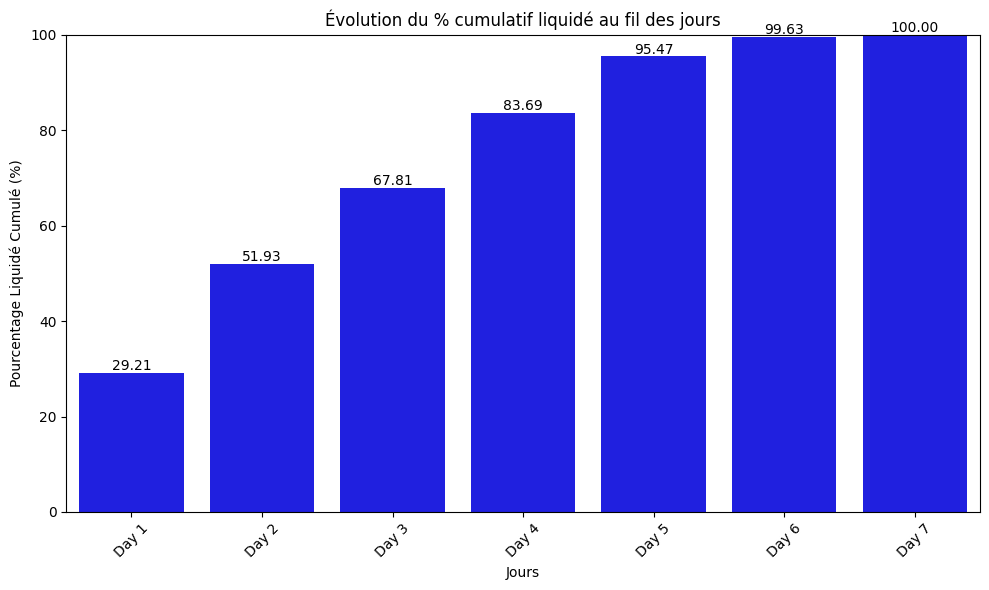

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cumulative_liquidation(liquidation_value):
    """
    Affiche le graphique en barres du % cumulatif liquidé

    Paramètre:
    ----------
    liquidation_value : pd.DataFrame
        DataFrame contenant la ligne "% Cumulatif liquidé"
    """
    # Extraire les % cumulés liquidés
    percent_cumulatif = liquidation_value.loc["% Cumulatif liquidé"].astype(float)

    # Créer le barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percent_cumulatif.index, y=percent_cumulatif.values, color='b')

    plt.title("Évolution du % cumulatif liquidé au fil des jours")
    plt.xlabel("Jours")
    plt.ylabel("Pourcentage Liquidé Cumulé (%)")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   fontsize=10, color='black',
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.tight_layout()
    plt.show()

plot_cumulative_liquidation(liquidation_results)

Le premier jour, nous pouvons liquider environ 29% du portefeuille. Cela est un problème si par exemple 35% (plus de 29%) des investisseurs veulent racheter leurs parts immédiatement. Nous ferions face à un problème de liquidité.

### Question 5

Profil d'écoulement avec les poids

---

Profil d'écoulement des poids du portefeuille :
       Initial Weight Weight Day 1 Weight Day 2 Weight Day 3 Weight Day 4  \
BNP.PA         11.23%        7.36%        0.00%        0.00%        0.00%   
RI.PA           1.94%        0.50%        0.00%        0.00%        0.00%   
KER.PA         11.70%       13.71%       16.05%       17.79%       22.90%   
ML.PA           9.27%       10.93%       12.92%       14.55%       19.33%   
MC.PA          34.56%       38.42%       41.26%       38.72%       31.25%   
OR.PA          17.63%       19.41%       20.49%       18.51%       12.66%   
SW.PA           2.77%        3.32%        4.02%        4.71%        6.75%   
AC.PA           3.90%        4.54%        5.26%        5.72%        7.10%   
HO.PA           3.24%        1.21%       -0.00%       -0.00%       -0.00%   
AI.PA           3.77%        0.60%       -0.00%       -0.00%       -0.00%   

       Weight Day 5 Weight Day 6 Weight Day 7  
BNP.PA        0.00%        0.00%        0.00%  
RI.PA   

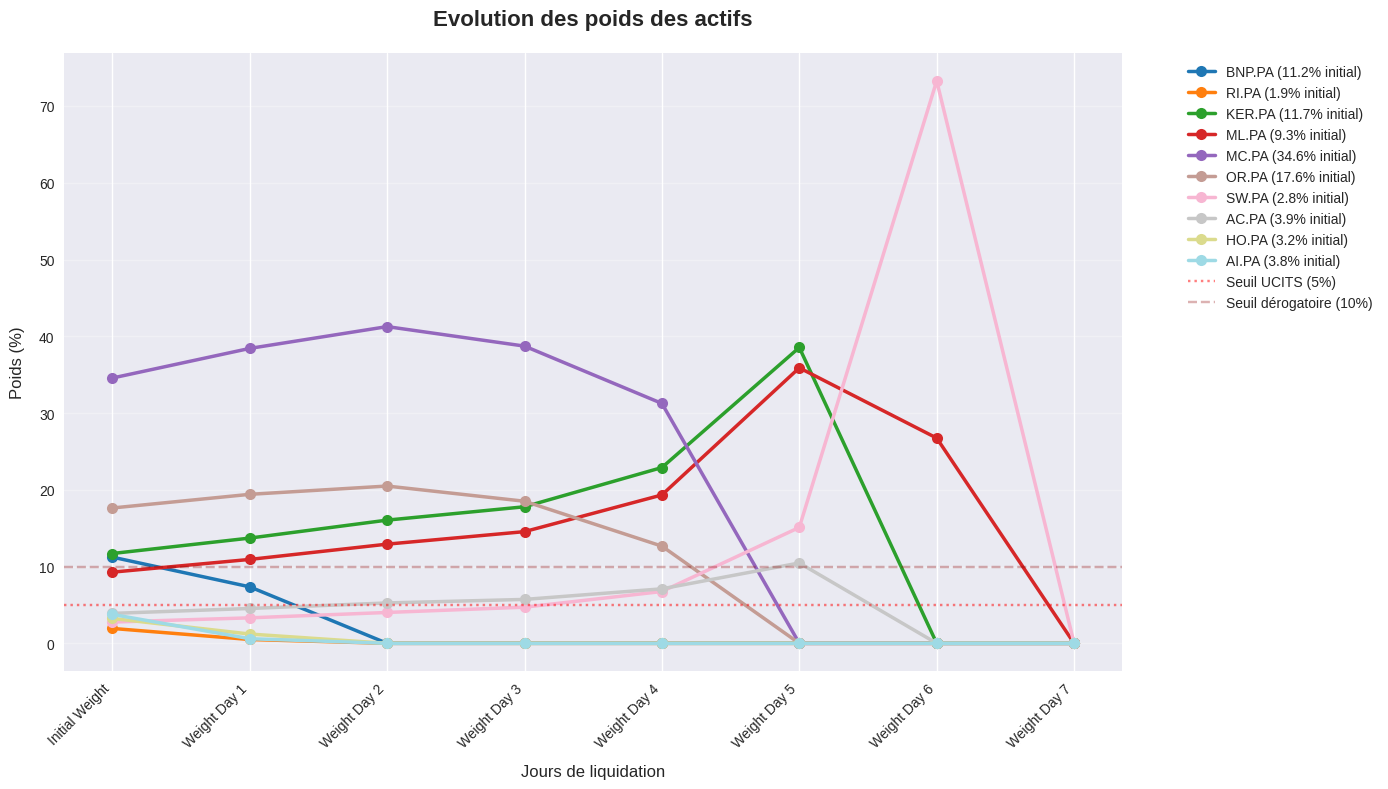

In [16]:
def analyze_weights_profile(simulated_volumes_df, liquidation_schedule, prices, portfolio_value_initial, show_plot=True):
    """
    Analyse l'évolution des poids du portefeuille pendant la liquidation

    Paramètres:
    -----------
    simulated_volumes_df : pd.DataFrame
        Volumes simulés du portefeuille (avec colonne "Simulated Volume")
    liquidation_schedule : pd.DataFrame
        Planning de liquidation (colonnes Day 1, Day 2...)
    prices : pd.DataFrame
        DataFrame des prix historiques
    portfolio_value_initial : float
        Valeur initiale du portefeuille
    show_plot : bool, optional
        Affiche le graphique si True (défaut: True)

    Retourne:
    --------
    pd.DataFrame
        Profil d'écoulement des poids
    """

    last_prices = prices.iloc[-1]

    # ---------------------------
    # PARTIE 1 : CALCUL DES POIDS
    # ---------------------------
    weights_profile = pd.DataFrame(index=liquidation_schedule.index)

    # Poids initiaux
    initial_weights = (simulated_volumes_df["Simulated Volume"] * last_prices) / portfolio_value_initial * 100
    weights_profile["Initial Weight"] = initial_weights.map(lambda x: f"{x:.2f}%")

    # Simulation jour par jour
    remaining_quantities = simulated_volumes_df["Simulated Volume"].copy()

    for col in liquidation_schedule.columns:
        if "Day" in col:
            remaining_quantities -= liquidation_schedule[col]
            remaining_value = (remaining_quantities * last_prices).sum()

            # Éviter la division par zéro
            if remaining_value > 0:
                daily_weights = (remaining_quantities * last_prices) / remaining_value * 100
            else:
                daily_weights = pd.Series(0, index=remaining_quantities.index)

            weights_profile[f"Weight {col}"] = daily_weights.map(lambda x: f"{x:.2f}%")

    print("Profil d'écoulement des poids du portefeuille :")
    print(weights_profile)

    # ---------------------------
    # PARTIE 2 : VISUALISATION
    # ---------------------------
    if show_plot:
        import matplotlib.pyplot as plt
        import numpy as np

        data = weights_profile.copy()
        for col in data.columns:
            data[col] = data[col].str.replace('%','').astype(float)

        # Configuration du graphique
        plt.style.use('seaborn-v0_8')
        plt.figure(figsize=(14, 8))
        colors = plt.cm.tab20(np.linspace(0, 1, len(data)))

        # Tracé des courbes
        for i, asset in enumerate(data.index):
            plt.plot(data.columns,
                    data.loc[asset],
                    marker='o',
                    linewidth=2.5,
                    color=colors[i],
                    markersize=8,
                    label=f"{asset} ({data.loc[asset,'Initial Weight']:.1f}% initial)")

        # Personnalisation
        plt.title('Evolution des poids des actifs', fontsize=16, pad=20, fontweight='bold')
        plt.xlabel('Jours de liquidation', fontsize=12, labelpad=10)
        plt.ylabel('Poids (%)', fontsize=12, labelpad=10)

        # Seuils et légende
        plt.axhline(y=5, color='red', linestyle=':', alpha=0.5, label='Seuil UCITS (5%)')
        plt.axhline(y=10, color='darkred', linestyle='--', alpha=0.3, label='Seuil dérogatoire (10%)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1, edgecolor='white')

        # Annotations
        for asset in data.index:
            last_val = data.loc[asset, data.columns[-1]]  # Utiliser la dernière colonne
            if last_val > 1:
                plt.text(len(data.columns)-1, last_val + 1, f"{last_val:.1f}%",
                        ha='center', va='bottom', fontsize=9,
                        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

        # Finalisation
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    return weights_profile

weights_results = analyze_weights_profile(
    simulated_volumes_df=simulated_volumes_df,
    liquidation_schedule=liquidation_schedule,
    prices=price_data,
    portfolio_value_initial=initial_value,
    show_plot=True
)

Nous observons clairement la déformation du portefeuille : au fil des jours, le poids de l'action "SW.PA" (Sodexo) augmente graduellement, jusqu'à atteindre 73%. Cela contredit totalement la règle du "5%-10%-40%".

Par ailleurs, cela crée une exposition excessive : en cas de choc sur Sodexo (ex: crise sectorielle, résultats décevants), la valeur résiduelle du portefeuille serait fortement impactée.

Nous perdons ainsi la diversification du portefeuille.

Afin de palier à ce soucis, nous utiliserons un profil d'écoulement sans déformation, que nous verrons par la suite (profils d'écoulement 3 et 4).

## Profil d'écoulement 2 : Conditions stressées avec déformation

Nous allons d'abord observer l'effet d'un choc (un stress) sur le profil de liquidation du portefeuille. Afin d'effectuer notre stress, nous supposons par exemple que nous ne pouvons écouler que 50% de la quantité liquidable en un jour (cette valeur pourra être ajustée).

Nous ne ferons que les premières étapes afin d'observer l'effet du stress sur le nombre de jours supplémentaires nécessaires afin de liquider le portefeuille.

---
Afin de faire le stress, il suffit donc de diviser la quantité liquidable en un jour par 2 (par exemple). Le reste du code est similaire à celui de la question 3.


Average Daily Volume (ADV) sur les 3 derniers mois:
BNP.PA   3127803.12
RI.PA     687653.27
KER.PA    407580.50
ML.PA    1889766.48
MC.PA     511973.62
OR.PA     460226.03
SW.PA     283462.45
AC.PA     652467.95
HO.PA     394590.66
AI.PA     774671.19

Derniers prix disponibles (2025-03-29):
BNP.PA    78.55
RI.PA     94.12
KER.PA   199.24
ML.PA     33.00
MC.PA    587.10
OR.PA    345.10
SW.PA     59.95
AC.PA     42.79
HO.PA    246.60
AI.PA    176.32

Volumes simulés du portefeuille :
        Simulated Volume
BNP.PA        1167089.27
RI.PA          168200.11
KER.PA         479096.56
ML.PA         2291880.60
MC.PA          480457.88
OR.PA          417043.23
SW.PA          376594.85
AC.PA          742949.73
HO.PA          107193.54
AI.PA          174497.76

Quantités liquidables en 1 jour (ratio 10.0% de l'ADV):
BNP.PA   312780
RI.PA     68765
KER.PA    40758
ML.PA    188977
MC.PA     51197
OR.PA     46023
SW.PA     28346
AC.PA     65247
HO.PA     39459
AI.PA     77467

PLANNING DE LIQUID

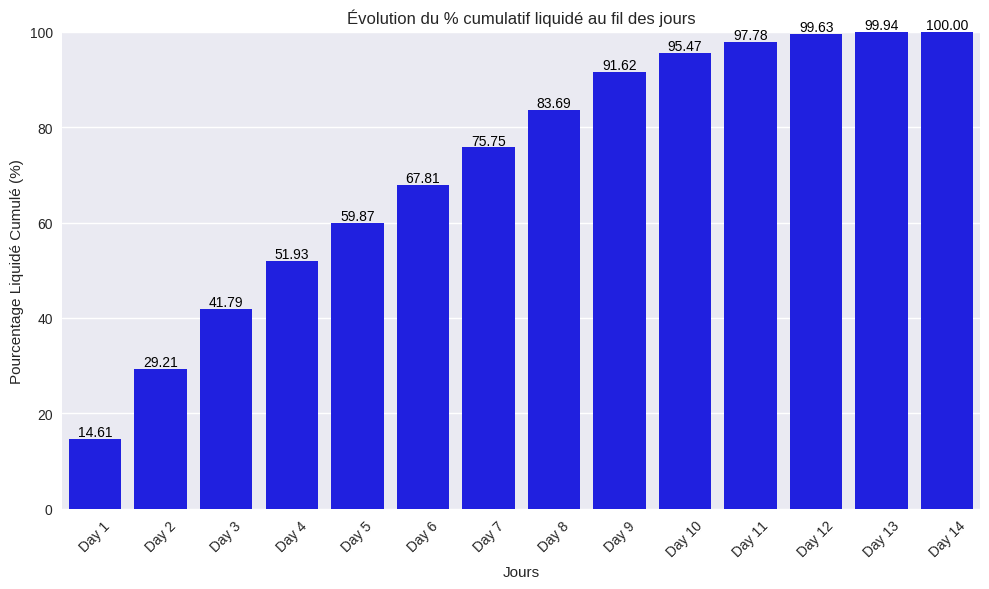

Profil d'écoulement des poids du portefeuille :
       Initial Weight Weight Day 1 Weight Day 2 Weight Day 3 Weight Day 4  \
BNP.PA         11.23%        9.63%        7.36%        3.78%        0.00%   
RI.PA           1.94%        1.34%        0.50%        0.00%        0.00%   
KER.PA         11.70%       12.53%       13.71%       14.97%       16.05%   
ML.PA           9.27%        9.96%       10.93%       11.98%       12.92%   
MC.PA          34.56%       36.16%       38.42%       40.40%       41.26%   
OR.PA          17.63%       18.37%       19.41%       20.27%       20.49%   
SW.PA           2.77%        3.00%        3.32%        3.68%        4.02%   
AC.PA           3.90%        4.16%        4.54%        4.93%        5.26%   
HO.PA           3.24%        2.40%        1.21%       -0.00%       -0.00%   
AI.PA           3.77%        2.45%        0.60%       -0.00%       -0.00%   

       Weight Day 5 Weight Day 6 Weight Day 7 Weight Day 8 Weight Day 9  \
BNP.PA        0.00%        0.

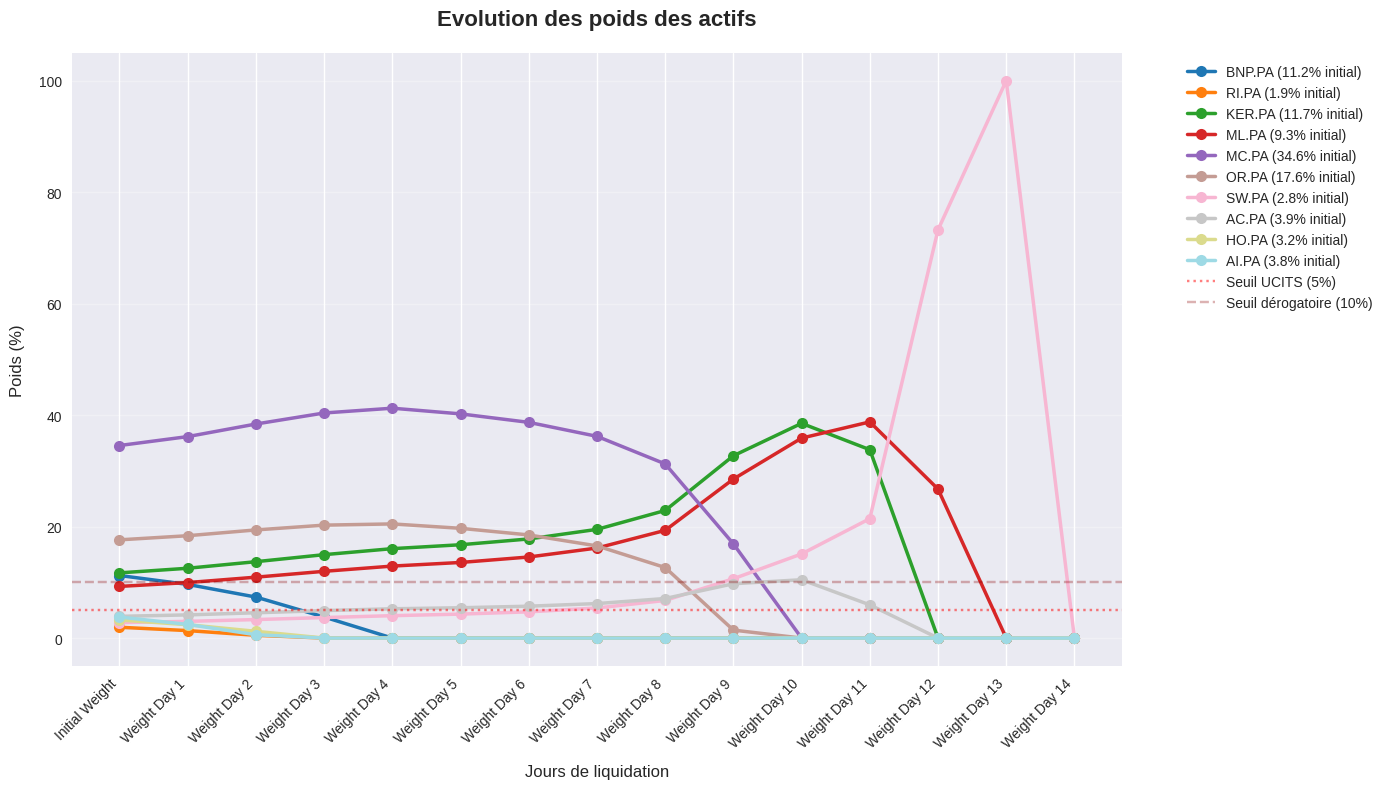

In [17]:
# Calcul des ADV 3 mois

tickers = ["BNP.PA", "RI.PA", "KER.PA", "ML.PA", "MC.PA",
        "OR.PA", "SW.PA", "AC.PA", "HO.PA", "AI.PA"]

adv_results, price_data = adv_3m(tickers)

# Simulation des volumes
simulated_volumes_df = simulate_portfolio_volumes(adv_results, seed=456)

# Calcul de la quantité liquidable en un jour (ratio = 0.1 pour effectuer un choc de 50%)
quantities_liquidable_1d_stressed = calculate_daily_liquidation(adv_results, ratio=0.10)

# Nombre de jours nécessaires à la liquidation
total_days_stressed, liquidation_schedule_stressed = generate_liquidation_schedule(
    simulated_volumes_df,
    quantities_liquidable_1d_stressed
)

# Sur les prix
liquidation_results_stressed, initial_value = calculate_liquidation_performance(
    prices=price_data,
    simulated_volumes_df=simulated_volumes_df,
    liquidation_schedule=liquidation_schedule_stressed
)

plot_cumulative_liquidation(liquidation_results_stressed)

# Sur les poids
weights_results_stressed = analyze_weights_profile(
    simulated_volumes_df=simulated_volumes_df,
    liquidation_schedule=liquidation_schedule_stressed,
    prices=price_data,
    portfolio_value_initial=initial_value,
    show_plot=True
)

Avec les conditions stressées, le portefeuille ne se liquiderait qu'en 14 jours, soit 7 jours de plus qu'auparavant.

Cela souligne d'autant plus le problème évoqué précédemment : maintenat, si plus de 15% des actionnaires veulent racheter leurs parts, nous ferons face à un soucis de liquidité.

## Profil d'écoulement 3 & 4 : Conditions sans déformation (avec ou sans stress)

Afin de palier aux soucis de déformation vus précédemment (les poids qui augmentent pour les actifs les plus illiquides, entraînant un risque de marché important pour le portefeuille car de moins en moins diversifié au fil des jours), nous allons maintenant effectuer une liquidation sans déformation.

Cela consiste à aller au rythme de l'actif le moins liquide, afin que les poids restent sensiblement les mêmes au fil du temps. __Nous liquiderons totalement le portefeuille sur le même nombre de jours qu'auparavant__, mais en adaptant notre stratégie de liquidation pour les actifs les plus liquides, afin de garder la composition du portefeuille initiale.

---



Valeur initiale du portefeuille : 816160610.65
Valeur liquidée par jour et suivi des % liquidés :
                               Day 1            Day 2            Day 3  \
BNP.PA                13096406.35881   13096406.35881   13096406.35881   
RI.PA                 2261609.545998   2261609.545998   2261515.425995   
KER.PA               13636384.455963  13636384.455963  13636583.695969   
ML.PA                     10804596.0       10804563.0       10804596.0   
MC.PA                40296781.024292  40296781.024292  40296781.024292   
OR.PA                20560368.163635  20560368.163635  20560023.063629   
SW.PA                 3225250.091045   3225250.091045   3225250.091045   
AC.PA                  4541559.53717    4541559.53717    4541559.53717   
HO.PA                 3776185.893463   3776185.893463   3776432.493469   
AI.PA                 4395305.142578   4395305.142578   4395305.142578   
% Liquidé par jour             14.29            14.29            14.29   
% Cumulatif li

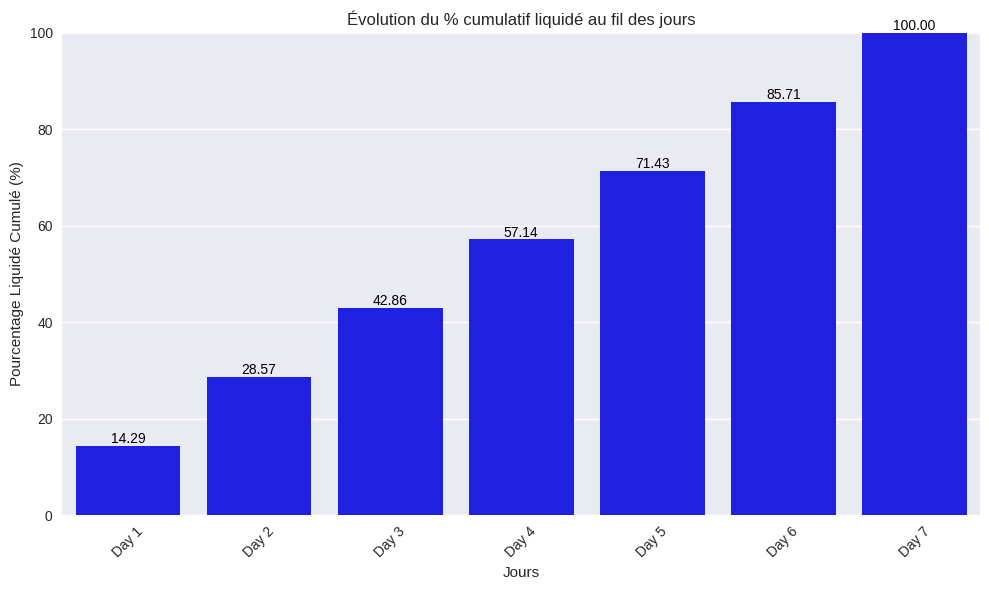

Profil d'écoulement des poids du portefeuille :
       Initial Weight Weight Day 1 Weight Day 2 Weight Day 3 Weight Day 4  \
BNP.PA         11.23%       11.23%       11.23%       11.23%       11.23%   
RI.PA           1.94%        1.94%        1.94%        1.94%        1.94%   
KER.PA         11.70%       11.70%       11.70%       11.70%       11.70%   
ML.PA           9.27%        9.27%        9.27%        9.27%        9.27%   
MC.PA          34.56%       34.56%       34.56%       34.56%       34.56%   
OR.PA          17.63%       17.63%       17.63%       17.63%       17.63%   
SW.PA           2.77%        2.77%        2.77%        2.77%        2.77%   
AC.PA           3.90%        3.90%        3.90%        3.90%        3.90%   
HO.PA           3.24%        3.24%        3.24%        3.24%        3.24%   
AI.PA           3.77%        3.77%        3.77%        3.77%        3.77%   

       Weight Day 5 Weight Day 6 Weight Day 7  
BNP.PA       11.23%       11.23%        0.00%  
RI.PA   

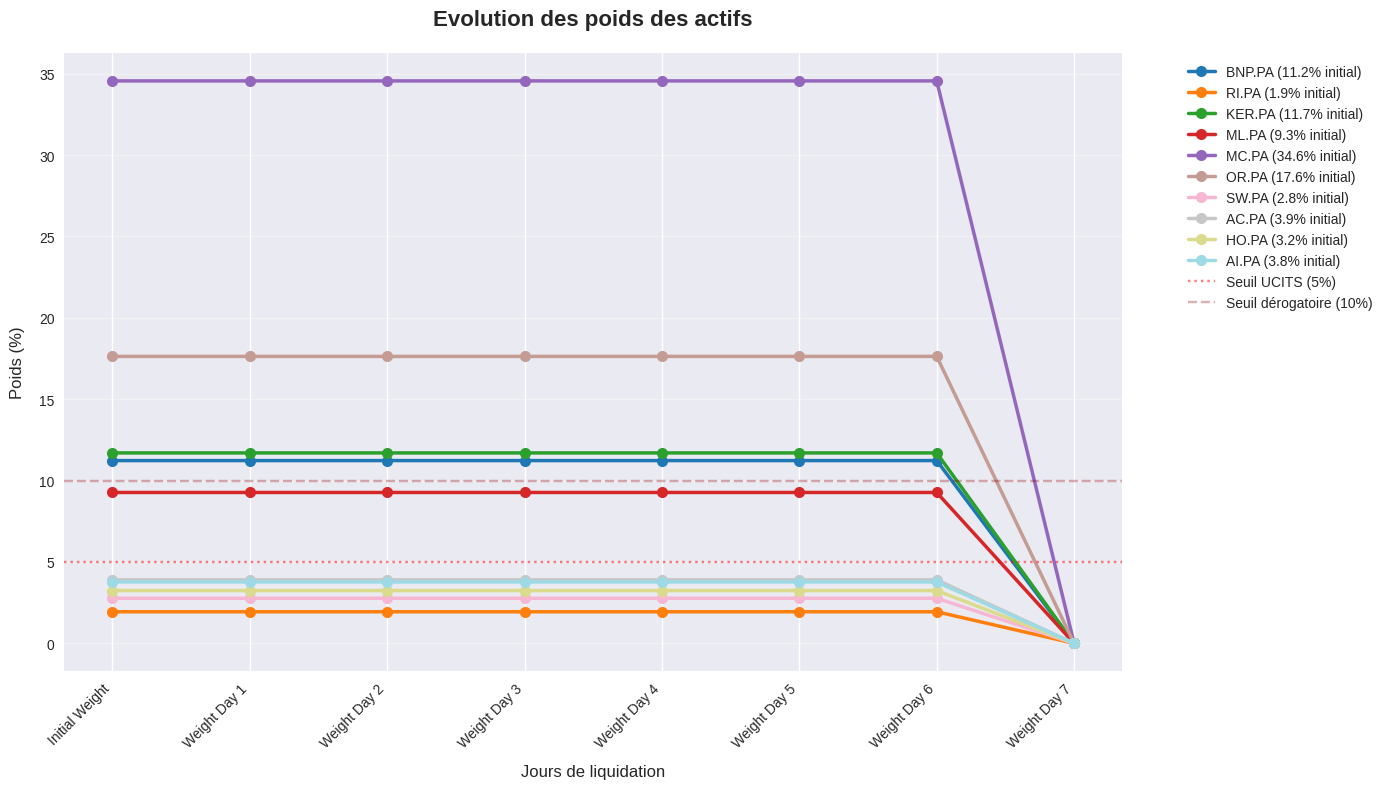

In [18]:
def liquidate_without_distortion(simulated_volumes_df, adv_series, prices, liquidation_days=7, ratio=0.20, verbose=True):
    """
    Liquidation sans déformation en utilisant les fonctions existantes

    Paramètres:
    -----------
    liquidation_days : int
        Nombre de jours fixé (7 par défaut)
    """
    # Initialisation
    last_prices = prices.iloc[-1]
    quantities_held = simulated_volumes_df["Simulated Volume"].copy()
    liquidation_capacity = (adv_series * ratio).round(0)

    # Planning de liquidation
    liquidation_schedule = pd.DataFrame(index=quantities_held.index)

    # Calcul des quantités à liquider chaque jour
    for day in range(1, liquidation_days + 1):
        qty = np.minimum(
            (quantities_held / (liquidation_days - day + 1)).round(0),  # Proportion restante
            liquidation_capacity  # Respect des limites de marché
        )
        liquidation_schedule[f"Day {day}"] = qty
        quantities_held -= qty

    # Pour la suite, utilisation des fonctions déjà implémentées
    # 1. Calcul des valeurs liquidées
    liquidation_results, initial_value = calculate_liquidation_performance(
        prices=prices,
        simulated_volumes_df=simulated_volumes_df,
        liquidation_schedule=liquidation_schedule
    )

    # 2. Visualisation du % cumulé
    plot_cumulative_liquidation(liquidation_results)

    # 3. Analyse des poids
    weights_results = analyze_weights_profile(
        simulated_volumes_df=simulated_volumes_df,
        liquidation_schedule=liquidation_schedule,
        prices=prices,
        portfolio_value_initial=initial_value,
        show_plot=True
    )

    return liquidation_schedule, weights_results

liquidation_schedule_stable, weights_stable = liquidate_without_distortion(
    simulated_volumes_df=simulated_volumes_df,
    adv_series=adv_results,
    prices=price_data
)

Nous observons que les poids restent les mêmes, et que la part de la valeur du portefeuille liquidé est de 14.29% chaque jour.
Cela veut dire que les premiers jours, nous liquidons moins d'actifs, mais cela permet de ne pas déformer le portefeuille. Il y a donc un compromis entre les deux méthodes.

---

Nous pouvons obtenir les conditions stressées en baissant la valeur de "ratio". Pour un choc de 50% par exemple, nous pouvons passer la valeur de 20% à 10%.

# Troisième séance


## Question 1
Coder une fonction permettant de calculer le prix d'une obligation dont les caractéristiques sont les suivantes :
* c = 0.02
* T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
* r = 0.02
* lambda_ = 0
* R = 0.4
* t = 0

Il n'y a ici pas de risque de défaut car λ = 0.

---

Nous implémentons le pricing de l'obligation suite à ce raisonnement :

Notons τ le temps de défaut \\
Alors :
$$P(u < \tau < u + du) = P(\tau < u + du) - P(\tau < u) \\
= P(\tau > u) - P(\tau > u + du) \\
= - \frac{dP(\tau > u)}{du} \, du = \lambda e^{-\lambda(u - t)} \, du $$

car $P(\tau > u) = e^{-\lambda(u - t)}$

Ainsi,
$$ \mathcal{R}_t = \int_t^T R \cdot \lambda e^{-\lambda(u - t)}e^{-r(u-t)} \, du = \lambda R \int_t^T e^{-\lambda(u - t)} \, du $$

$$ = \lambda R  \frac{1 - e^{-(r + \lambda)(T - t)}}{r + \lambda} $$


Nous obtenons ainsi :
$$ \mathcal{B}_t = c \sum_{i=1}^{n} e^{-(r + λ)(T_i - t)} \mathbb{1}_{T_i \geq t} + [e^{-(r+λ)(T_n - t)} +  \lambda R  \frac{1 - e^{-(r + \lambda)(T_n - t)}}{r + \lambda}] \mathbb{1}_{T_n \geq t}$$

---

Interprétations des trois termes de l'équation finale :

* 1. Coupons actualisés :
Ce terme représente la valeur actuelle des coupons futurs que l'obligation va payer.
Il calcule la somme des valeurs actuelles de tous les coupons, en tenant compte du temps et du risque de défaut.

* 2. Nominal actualisé : Ce terme représente la valeur actuelle du nominal de l'obligation, qui est remboursé à la maturité.
Il calcule la valeur actuelle du nominal, en supposant qu'il n'y a pas de défaut avant la maturité.

* 3. Valeur en cas de défaut :
Ce terme représente la valeur actuelle des pertes potentielles dues à un défaut de l'obligation avant la maturité.
Il calcule la valeur actuelle des pertes attendues en cas de défaut, en tenant compte du taux de recouvrement R.

---

Pour l'implémentation, nous avons décidé de mettre une liste de $T_i$ (une date de détachement d'un coupon par exemple) plutôt que la maturité finale, afin de pouvoir facilement adapter le code dans le cas où tous les $T_i$ ne seraient pas équidistants (nous avons une distance de 1 dans notre cas).

In [19]:
def Bond(c, T_list, r, lambda_, R, t):
    """
    Calcule la valeur du bond selon la formule donnée.

    :param c: Taux de coupon
    :param T_list: Liste des temps T_i
    :param r: Taux d'intérêt
    :param lambda_: Paramètre lambda
    :param R: Paramètre R
    :param t: Temps t
    :return: Valeur du bond B_t
    """
    n = len(T_list)
    T_n = T_list[-1]

    # Calcul de la première partie de l'équation avec indicatrice T_i >= t
    first_part = c * sum(math.exp(-(r + lambda_) * (T_i - t)) if T_i >= t else 0 for T_i in T_list)

    # Calcul de la deuxième partie de l'équation avec indicatrice T_n >= t
    if T_n >= t:
        second_part = math.exp(-(r + lambda_) * (T_n - t)) + lambda_ * R * (1 - math.exp(-(r + lambda_) * (T_n - t))) / (r + lambda_)
    else:
        second_part = 0

    B_t = first_part + second_part

    return B_t

# nous lançons la fonction avec les paramètres suivants :
c = 0.02
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0
R = 0.4
t = 0

B_t = Bond(c, T_list, r, lambda_, R, t)
print(f"La valeur du bond est: {B_t}")

La valeur du bond est: 0.9981933497987289


La valeur du bond est proche de 1, i.e. au pair.

Ce résultat était attendu car le taux de coupon est égal au taux d'intérêt + \lambda.

Concrètement, l'obligation est au pair ssi P = 1 i.e. $$ c - r = λ (1-R)$$

## Question 2

Nous cherchons maintenant le taux de coupon c tel que l'obligation est au pair.
Nous supposons maintenant que λ = 1%.

---

Pour cela, nous implémentons un solveur, en cherchant la valeur c tq $\mathcal{B}_t = 1$

In [20]:
# Fonction pour résoudre B_t(c) = 1
def equation_to_solve(c, T_list, r, lambda_, R, t):
    return Bond(c, T_list, r, lambda_, R, t) - 1

# Paramètres
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0.01
R = 0.4
t = 0

# Estimation initiale pour c
initial_guess = 0.02

# Résolution pour trouver c tel que B_t = 1
c_solution = fsolve(equation_to_solve, initial_guess, args=(T_list, r, lambda_, R, t))

print(f"La valeur de c telle que B_t = 1 est : {c_solution[0] * 100:.4f}%")

La valeur de c telle que B_t = 1 est : 2.6394%


Nous nous attendions à une valeur d'environ 3% car r + λ = 3%.

Avec la formule exacte, nous savons que cette valeur devrait être plus petite car λ est en fait multiplié par (1 + R), ce qui fait baisser la valeur. La sortie est donc cohérente.

---

Si nous valorisons avec un taux de coupon de 2.89%, nous trouvons effectivement une obligation au pair :

In [21]:
c = 0.026394
B_t = Bond(c, T_list, r, lambda_, R, t)
print(f"La valeur du bond est: {B_t}")

La valeur du bond est: 1.0000006006132323


## Question 3
Valoriser l'obligation dont les paramètres sont :
* λ = 10
* r = 2%
* c = 3%
* t =0
* $T_n$ = 10

In [22]:
c = 0.03
r = 0.02
lambda_ = 10

B_t = Bond(c, T_list, r, lambda_, R, t)
print(f"La valeur du bond est: {B_t}")

La valeur du bond est: 0.39920293189432754


Nous observons que la valeur du bond est très proche du celle de taux de recouvrement R (40%).

Le taux de défaut est maintenant très élevé (λ = 10); le prix est donc faible et environ égal au taux de recouvrement car la probabilité de défaut est si forte que les coupons et le nominal ont peu de chances d'être payés.

## Question 4

Tracer l'évolution du prix de l'action en fonction du temps, pour t allant de 0 à 10.

Nous prendrons les paramètres suivants :
* λ = 1%
* R = 40%
* r = 2%
* c = 3%

---

Pour ce faire, nous utilisons simplement la fonction codée à la question 1, et l'appliquons pour différentes valeurs de t.

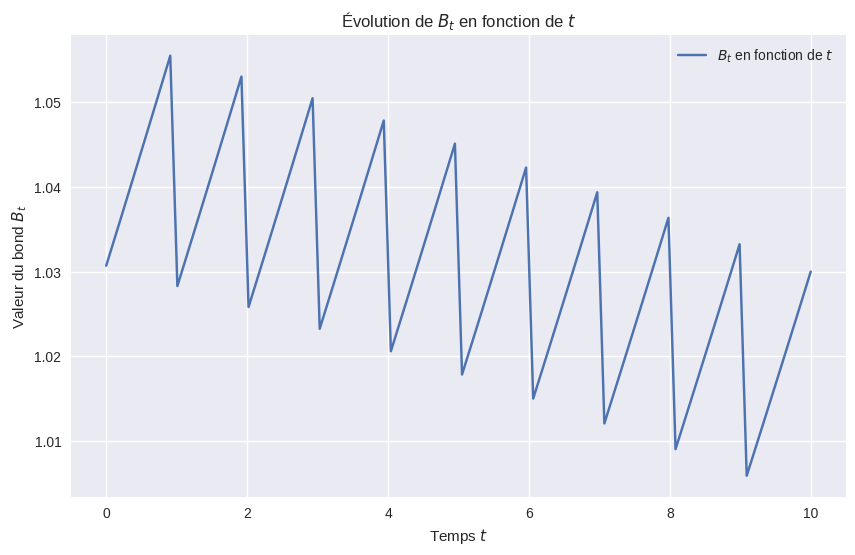

In [23]:
# Paramètres
c = 0.03
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0.01
R = 0.4

# Création d'une liste de valeurs de t de 0 à 10
t_values = np.linspace(0, 10, 100)

# Calcul des valeurs de B_t pour chaque t
B_t_values = [Bond(c, T_list, r, lambda_, R, t) for t in t_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(t_values, B_t_values, label=r"$B_t$ en fonction de $t$")
plt.xlabel("Temps $t$")
plt.ylabel("Valeur du bond $B_t$")
plt.title(r"Évolution de $B_t$ en fonction de $t$")
plt.grid(True)
plt.legend()
plt.show()

Nous observons une courbe en dents de scie :

À chaque date de paiement de coupon $T_i$, la valeur de l'obligation baisse brusquement. Cela s'explique par le fait que le coupon est payé à l'investisseur, ce qui réduit la valeur résiduelle de l'obligation.
Le coupon étant un flux de trésorerie sortant pour l'émetteur, il diminue la valeur actuelle des flux futurs.

Entre deux dates de paiement $T_i$ et $T_{i+1}$, la valeur de l'obligation augmente progressivement.
Cette croissance est due à l'actualisation des flux futurs (coupons et nominal) qui se rapprochent dans le temps.
Plus on se rapproche de la date de paiement suivante, plus la valeur actuelle de ces flux augmente.

C'est pour cela que nous l'appelons le "dirty price".

## Question 5
Faire le clean price sur le même graphique

---

Le clean price est définie comme :
$$ \tilde{\mathcal{B}}_t = \mathcal{B}_t - cc$$

avec cc le coupon couru.

Ce dernier est calculé comme suit :
$$ cc = c(t - T^*) $$
avec $T^*$ la date du dernier coupon payé.

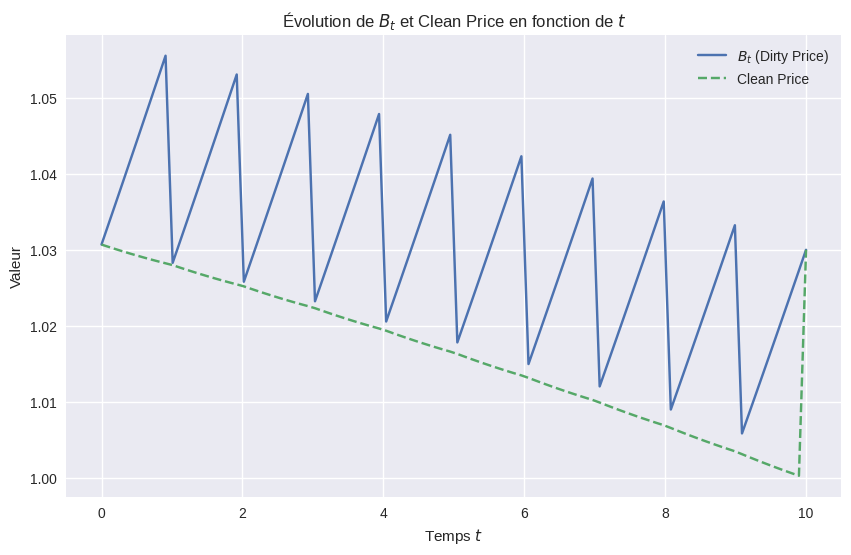

In [24]:
def clean_price(c, T_list, r, lambda_, R, t):
    """
    Calcule le clean price du bond.

    :param c: Taux de coupon
    :param T_list: Liste des temps T_i
    :param r: Taux d'intérêt
    :param lambda_: Paramètre lambda
    :param R: Paramètre R
    :param t: Temps t
    :param T_star: Date du dernier paiement de coupon
    :return: Clean price du bond
    """
    # Calcul du dirty price (Bt)
    dirty_price = Bond(c, T_list, r, lambda_, R, t)

    T_star = math.floor(t)
    # Calcul du coupon couru
    accrued_coupon = c * (t - T_star)

    # Calcul du clean price
    clean_price = dirty_price - accrued_coupon

    return clean_price

# Paramètres
c = 0.03
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0.01
R = 0.4

# Création d'une liste de valeurs de t de 0 à 10
t_values = np.linspace(0, 10, 100)

# Calcul des valeurs de B_t et clean price pour chaque t
B_t_values = [Bond(c, T_list, r, lambda_, R, t) for t in t_values]
clean_price_values = [clean_price(c, T_list, r, lambda_, R, t) for t in t_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(t_values, B_t_values, label=r"$B_t$ (Dirty Price)")
plt.plot(t_values, clean_price_values, label=r"Clean Price", linestyle="--")
plt.xlabel("Temps $t$")
plt.ylabel("Valeur")
plt.title(r"Évolution de $B_t$ et Clean Price en fonction de $t$")
plt.grid(True)
plt.legend()
plt.show()

Le pic final sur la courbe du clean price correspond aux coupons qui s'accumulent.

La valeur finale de l'obligation est d'ailleurs de 1.03, ce qui correspond à 100% du nominal + le taux de coupon qui était fixé à 3%. On converge donc vers N + c.

Par ailleurs, nous n'observons pas de mouvements significatifs car nous sommes autour de la monnaie.

---

Avec c = 1%, nous observons un tout autre comportement :

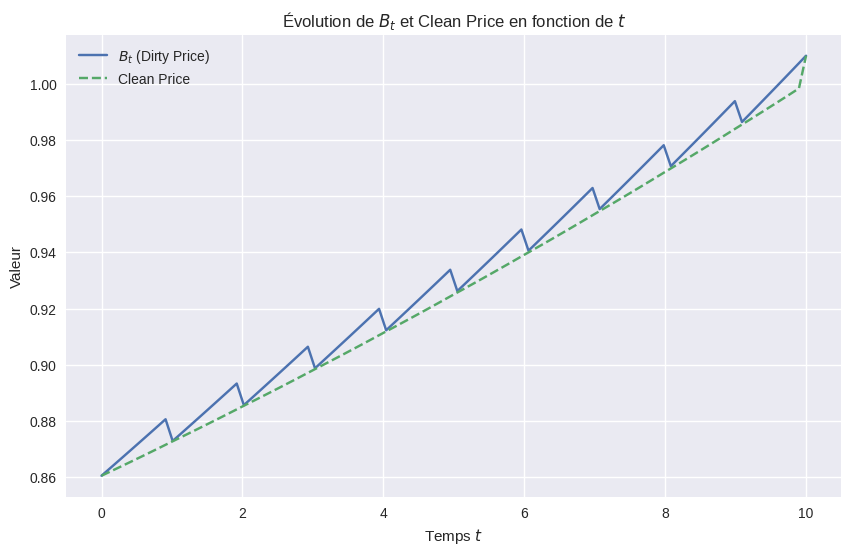

In [25]:
# Paramètres
c = 0.01
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0.01
R = 0.4

# Création d'une liste de valeurs de t de 0 à 10
t_values = np.linspace(0, 10, 100)

# Calcul des valeurs de B_t et clean price pour chaque t
B_t_values = [Bond(c, T_list, r, lambda_, R, t) for t in t_values]
clean_price_values = [clean_price(c, T_list, r, lambda_, R, t) for t in t_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(t_values, B_t_values, label=r"$B_t$ (Dirty Price)")
plt.plot(t_values, clean_price_values, label=r"Clean Price", linestyle="--")
plt.xlabel("Temps $t$")
plt.ylabel("Valeur")
plt.title(r"Évolution de $B_t$ et Clean Price en fonction de $t$")
plt.grid(True)
plt.legend()
plt.show()

La fonction est maintenant croissante. Cela s'explique par le fait que le coupon est très petit (1 %) et ne suffit pas à couvrir les deux risques (de crédit et de taux d'intérêt). Par conséquent, l'obligation ne peut pas être vendue au pair (i.e. à 100% de sa valeur nominale), mais doit être proposée à un prix inférieur (un peu plus de 85 % sur le graphique).

Au fil du temps, la valeur de l'obligation augmente progressivement. À l'approche de la maturité, l'incertitude diminue, car les flux futurs (coupons et nominal) deviennent plus certains. À la dernière date, juste avant la maturité, le prix de l'obligation atteint 101 %. Cela s'explique par le fait que l'investisseur reçoit à la fois le nominal (100 %) et le dernier coupon (1 %). Ainsi, à la fin, l'obligation vaut 101 %, car tous les flux sont perçus sans risque de défaut.

---

Avec c = 5%

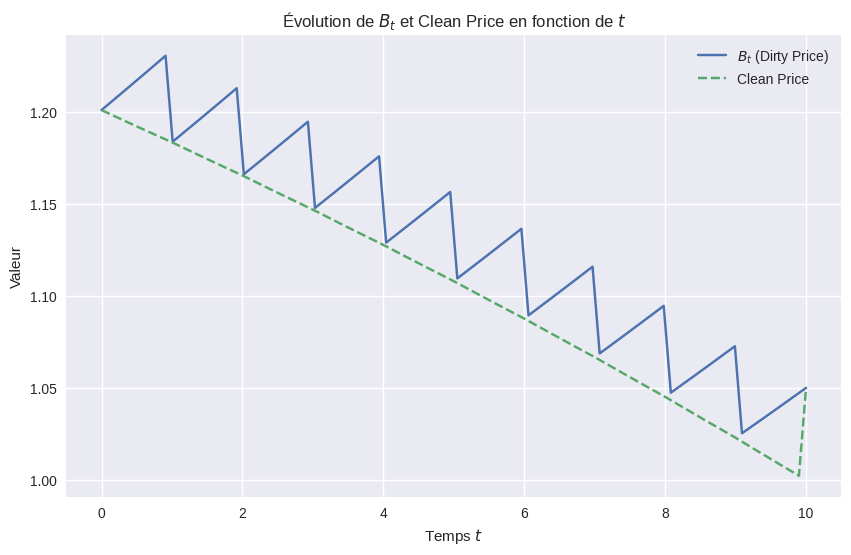

In [26]:
# Paramètres
c = 0.05
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0.01
R = 0.4

# Création d'une liste de valeurs de t de 0 à 10
t_values = np.linspace(0, 10, 100)

# Calcul des valeurs de B_t et clean price pour chaque t
B_t_values = [Bond(c, T_list, r, lambda_, R, t) for t in t_values]
clean_price_values = [clean_price(c, T_list, r, lambda_, R, t) for t in t_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(t_values, B_t_values, label=r"$B_t$ (Dirty Price)")
plt.plot(t_values, clean_price_values, label=r"Clean Price", linestyle="--")
plt.xlabel("Temps $t$")
plt.ylabel("Valeur")
plt.title(r"Évolution de $B_t$ et Clean Price en fonction de $t$")
plt.grid(True)
plt.legend()
plt.show()

La fonction est maintenant décroissante : dès que l'obligation est mise sur le marché, elle devient une opportunité attractive pour les investisseurs. Le coupon proposé est suffisant pour compenser à la fois le risque de crédit (risque de défaut) et le risque de taux d'intérêt. Cela attire les investisseurs, qui se ruent sur l'obligation, ce qui fait monter son prix. Elle se vend alors au-dessus du pair (plus que 100 % de sa valeur nominale).

Au fil du temps, la valeur de l'obligation se rapproche de
N+c, car les flux futurs (nominal et dernier coupon) deviennent de plus en plus certains. À l'approche de la maturité, l'incertitude diminue, et le prix reflète principalement la valeur du nominal et du dernier coupon.

## Question 6

Faire varier le taux d'intérêt entre 0 et 10%.

---

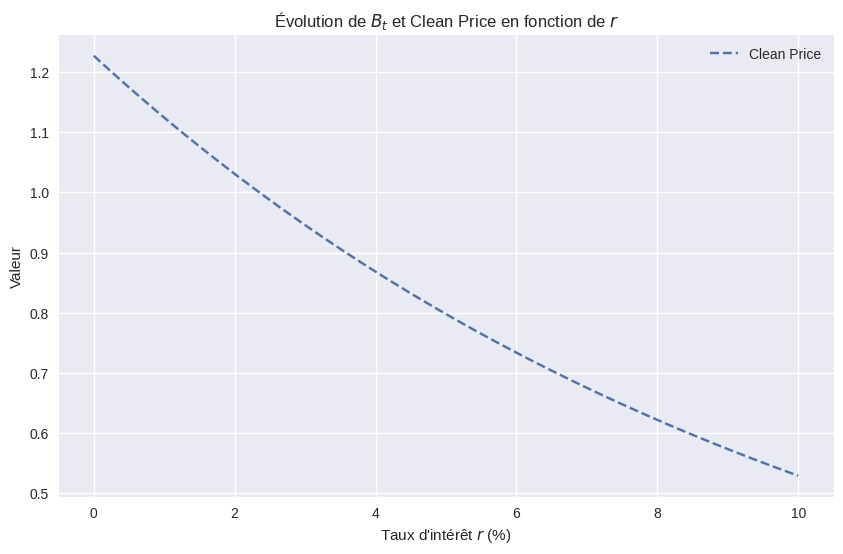

In [27]:
# Paramètres fixes
c = 0.03
lambda_ = 0.01
R = 0.4
t = 0
T_star = 0  # Date du dernier paiement de coupon
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Dates de paiement des coupons

# Création d'une liste de valeurs de r de 0% à 10%
r_values = np.linspace(0, 0.10, 100)  # r varie de 0% à 10%

# Calcul des valeurs de clean price pour chaque r
clean_price_values = [clean_price(c, T_list, r, lambda_, R, t) for r in r_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(r_values * 100, clean_price_values, label=r"Clean Price", linestyle="--")
plt.xlabel("Taux d'intérêt $r$ (%)")
plt.ylabel("Valeur")
plt.title(r"Évolution de $B_t$ et Clean Price en fonction de $r$")
plt.grid(True)
plt.legend()
plt.show()

Nous observons que le prix de l'obligation est décroissant avec le taux d'intérêt. Cela s'explique car les flux futurs (coupons et nominal) sont actualisés à un taux plus élevé, réduisant ainsi leur valeur actuelle.


Nous pouvons également vérifier que l'obligation est bien au pair vers 2% (car c = 3% et λ=1%).

## Question 7

Calcul de la sensibilité

---

Pour rappel, nous calculons la sensibilité à l'aide de la formule :
$$ sensibilité = - \frac{dB_t}{dr} * \frac{1}{B_t} \approx \frac{B_t(r + Δr - B_t(r)}{Δr}* \frac{1}{B_t} $$

In [28]:
def sensitivity(c, T_list, r, lambda_, R, t, delta_r=1e-4):
    """
    Calcule la sensibilité de l'obligation.

    :param c: Taux de coupon
    :param T_list: Liste des temps T_i
    :param r: Taux d'intérêt actuel
    :param lambda_: Paramètre lambda
    :param R: Paramètre R
    :param t: Temps t
    :param delta_r: Petite variation du taux d'intérêt (par défaut 0.01%)
    :return: Sensibilité de l'obligation
    """
    # Calcul de B_t au taux actuel r
    B_t_r = Bond(c, T_list, r, lambda_, R, t)

    # Calcul de B_t au taux r + delta_r
    B_t_r_plus_delta = Bond(c, T_list, r + delta_r, lambda_, R, t)

    # Calcul de la sensibilité
    sensitivity_value = -(1 / B_t_r) * ((B_t_r_plus_delta - B_t_r) / delta_r)

    return sensitivity_value

c = 0.03
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0.01
R = 0.4
t = 0

# Calcul de la sensibilité
sensitivity_value = sensitivity(c, T_list, r, lambda_, R, t)
print(f"La sensibilité de l'obligation est : {sensitivity_value:.6f}")

La sensibilité de l'obligation est : 8.643982


Une sensibilité de 8,64 signifie que pour une augmentation de 1 % du taux d'intérêt, le prix de l'obligation diminue d'environ 8,64 %, reflétant une forte exposition au risque de taux.



## Question 8
Faire varier les maturités entre 1 et 20, analyser la sensitivité associée

---

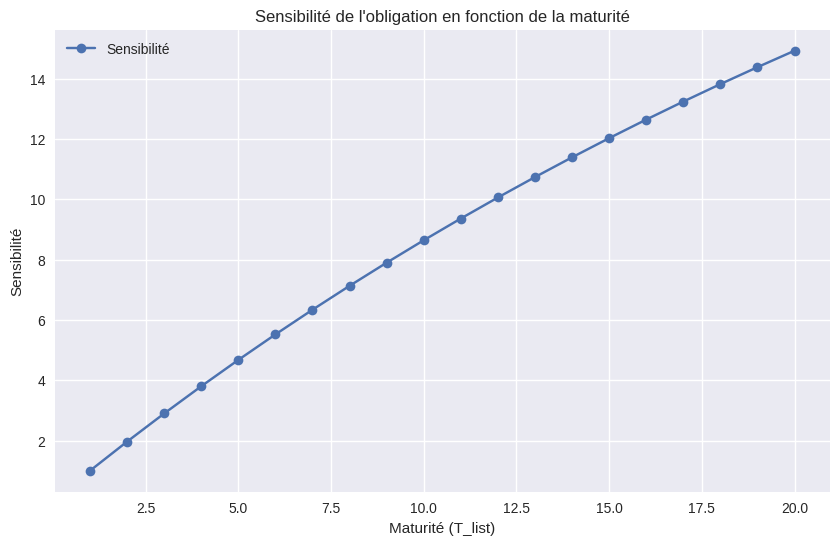

In [29]:
c = 0.03
r = 0.02
lambda_ = 0.01
R = 0.4
t = 0

# Création d'une liste de T_list de 1 à 20
T_list_values = [list(range(1, i + 1)) for i in range(1, 21)]  # T_list de [1] à [1, 2, ..., 20]

# Calcul des valeurs de sensibilité pour chaque T_list
sensitivity_values = [sensitivity(c, T_list, r, lambda_, R, t) for T_list in T_list_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sensitivity_values, marker='o', label="Sensibilité")
plt.xlabel("Maturité (T_list)")
plt.ylabel("Sensibilité")
plt.title("Sensibilité de l'obligation en fonction de la maturité")
plt.grid(True)
plt.legend()
plt.show()

Lorsque la maturité d'une obligation augmente, sa sensibilité aux variations des taux d'intérêt augmente également. Cela s'explique par le fait que les flux futurs (coupons et nominal) sont reçus sur une période plus longue, ce qui les expose davantage à l'effet de l'actualisation. Ainsi, plus la maturité est longue, plus une variation des taux d'intérêt a un impact important sur la valeur actuelle de ces flux, augmentant ainsi la sensibilité de l'obligation.

## Question 9

Même consigne que la 8, mais on suppose maintenant c, r et λ tendent vers 0.

---

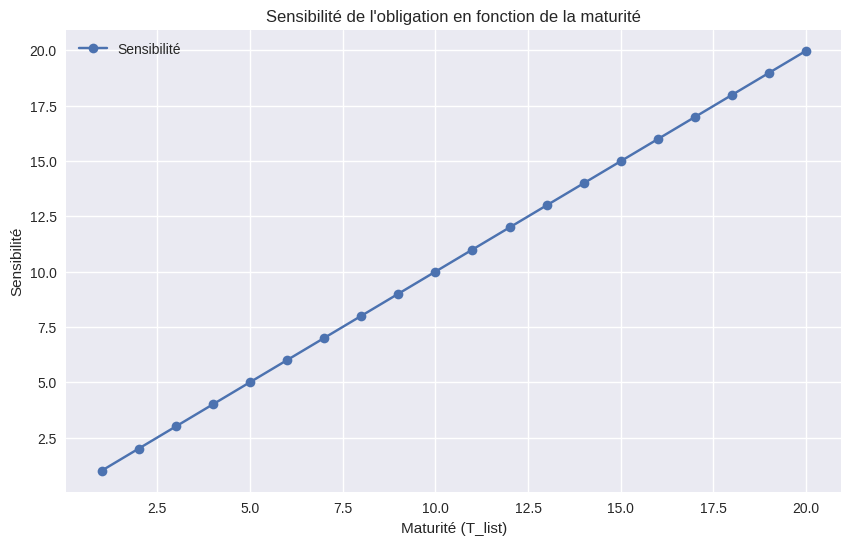

In [30]:
c = 0.000001
r = 0.000001
lambda_ = 0.000001
R = 0.4
t = 0

# Création d'une liste de T_list de 1 à 20
T_list_values = [list(range(1, i + 1)) for i in range(1, 21)]

# Calcul des valeurs de sensibilité pour chaque T_list
sensitivity_values = [sensitivity(c, T_list, r, lambda_, R, t) for T_list in T_list_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sensitivity_values, marker='o', label="Sensibilité")
plt.xlabel("Maturité (T_list)")
plt.ylabel("Sensibilité")
plt.title("Sensibilité de l'obligation en fonction de la maturité")
plt.grid(True)
plt.legend()
plt.show()

Lorsque le coupon c, le taux d'intérêt r et le taux de défaut λ tendent vers 0, la sensibilité de l'obligation (sa duration) se rapproche de sa maturité; nous avons la fonction identité. Cela s'explique par le fait que, dans ce cas, l'obligation se comporte comme un zéro-coupon : son prix dépend uniquement du nominal payé à maturité, et la duration devient égale au temps restant jusqu'à cette échéance. Ainsi, la duration reflète directement la maturité de l'obligation.


## Question 10

---

Dans cette question, nous calculons la VaR avec une approche par les sensibilités.

Nous savons que $ dr = (...) dt + σdW_t$ donc $Δr \sim \mathcal{N}(0 , \sigma \sqrt{Δt})$

Pour rappel, $$ \frac{ΔP}{P} = - Duration * Δr$$

d'où :
$$ \frac{ΔP}{P} \sim \mathcal{N}(0, Duration*\sigma *\sqrt{Δt}) $$

Ainsi, nous calculons la VaR à l'aide de la formule suivante :
$$ VaR = Duration * σ * \sqrt{Δt}*\mathcal{N}^{-1}(1 \%)
$$


Nous implémentons ainsi une fonction prenant en paramètres l'horizon, le niveau de confiance α, σ ainsi que tous les paramètres nécessaires au calcul du prix de l'obligation.

In [31]:
def VaR_sensi(sigma, h, alpha, c, T_list, r, lambda_, R, t):
  duration = sensitivity(c, T_list, r, lambda_, R, t)
  VaR = sigma * duration * math.sqrt(h) * norm.ppf(1 - alpha)
  return VaR

c = 0.03
r = 0.02
lambda_ = 0.01
R = 0.4
t = 0
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sigma = 0.01
h = 1/12 #un horizon de 1 mois
alpha = 0.99 # le niveau de confiance
print(f'La VaR avec approche par les sensibilités est de {VaR_sensi(sigma, h, alpha, c, T_list, r, lambda_, R, t):.5f}')


La VaR avec approche par les sensibilités est de -0.05805


La VaR calculée avec l'approche par les sensibilités est de -0.05924, ce qui signifie qu'avec un niveau de confiance de 99 %, la perte maximale attendue sur un horizon d'un mois est d'environ 5.92 % de la valeur de l'obligation, en tenant compte de la volatilité, de la duration et des autres paramètres du modèle.

Cette valeur est une approximation car la loi supposée est une hypothèse; nous avons également utilisé une approximation de discrétisation pour le calcul de la duration (nous avons fait une linéarisation).

---

Nous pouvons regarde l'influence de Δt sur la VaR :


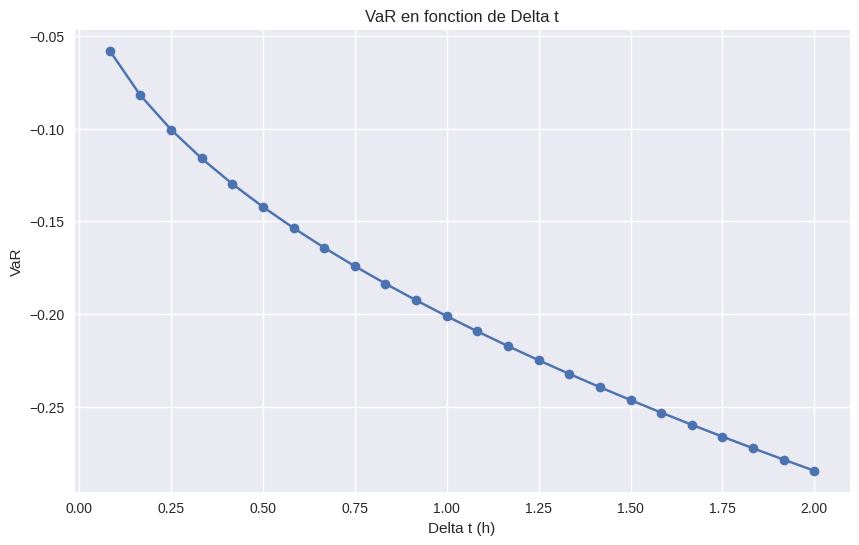

In [32]:
# Paramètres
c = 0.03
r = 0.02
lambda_ = 0.01
R = 0.4
t = 0
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sigma = 0.01
alpha = 0.99

# Variation de h
h_values = np.arange(1/12, 2 + 1/12, 1/12)
VaR_values = [VaR_sensi(sigma, h, alpha, c, T_list, r, lambda_, R, t) for h in h_values]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(h_values, VaR_values, marker='o')
plt.xlabel('Delta t (h)')
plt.ylabel('VaR')
plt.title('VaR en fonction de Delta t')
plt.grid(True)
plt.show()

La tendance décroissante de la VaR en fonction de $\Delta t$ (l'horizon temporel) s'explique par le fait que, dans ce modèle, la VaR est proportionnelle à la racine carrée de h (via le terme $\sigma \cdot \text{duration} \cdot \sqrt{h}$).

Lorsque h augmente, $\sqrt{h}$ augmente également, mais la VaR est exprimée en valeur négative (car elle représente une perte potentielle). Ainsi, plus h est grand, plus la VaR devient "plus négative", ce qui se traduit par une diminution sur le graphique. Cela reflète l'idée que sur un horizon temporel plus long, l'incertitude et le risque de perte potentielle augmentent, mais la VaR, étant une mesure de perte, apparaît plus faible (plus négative) sur l'axe des ordonnées.


Nous pouvons également refaire le calcul du sigma à partir des données de marché (Estr); nous obtenions σ = 0.77%

Si nous avions une volatilité log-normale ==> impossible à calculer déjà car avant juillet 2022, les taux sont négatifs donc le log est pas défini par construction
C'est pour cela que le modèle Hull&White revient en force.

## Question 11

Calculer la VaR avec une approche par re-pricing.

---

Détaillons dans un premier temps les fondements de cette approche.

On suppose que $Δr \sim σ\sqrt{Δt}Y, Y\sim \mathcal{N}(0,1)$

On pose $Δr* = \sigma \sqrt{Δt}\mathcal{N}^{-1}(99\%)$

La VaR par l'approche re-pricing s'écrit ainsi :
$$ VaR = -\frac{P(r + Δr*)-P(r)}{P(r)}
$$

In [33]:
def VaR_repricing(sigma, h, alpha, c, T_list, r, lambda_, R, t):
  B_t = Bond(c, T_list, r, lambda_, R, t)
  delta_r = sigma * math.sqrt(h) * norm.ppf(1 - alpha)
  B_t_plus_delta_r = Bond(c, T_list, r + delta_r, lambda_, R, t)
  VaR = -(B_t_plus_delta_r - B_t)/B_t
  return VaR

c = 0.03
r = 0.02
lambda_ = 0.01
R = 0.4
t = 0
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sigma = 0.01
alpha = 0.99
print(f'La VaR par approche re-pricing vaut {VaR_repricing(sigma, h, alpha, c, T_list, r, lambda_, R, t):.5f}')

La VaR par approche re-pricing vaut -0.05996


Nous observons que cette VaR (par repricing) est un peu plus faible que celle obtenue précédemment (avec sensibilité). C'est bien le résultat que l'on attendait (graphique au tableau).

## Question 12
Calculer la sensibilité crédit en fonction de la maturité

---

Pour calculer la sensibilité crédit, nous utilisons la formule suivante :
$$ sensibilité crédit = -\frac{∂P/∂s}{P} = - \frac{1}{1-R} \frac{∂P/∂λ}{P}$$

Nous utilisons ensuite une approximation de discrétisation

In [34]:
def sensitivity(c, T_list, r, lambda_, R, t, delta_lambda=1e-4):
    """
    Calcule la sensibilité de l'obligation.

    :param c: Taux de coupon
    :param T_list: Liste des temps T_i
    :param r: Taux d'intérêt actuel
    :param lambda_: Paramètre lambda
    :param R: Paramètre R
    :param t: Temps t
    :param delta_r: Petite variation du taux d'intérêt (par défaut 0.01%)
    :return: Sensibilité de l'obligation
    """
    # Calcul de B_t au taux actuel r
    B_t_lambda = Bond(c, T_list, r, lambda_, R, t)

    # Calcul de B_t au taux r + delta_r
    B_t_lambda_plus_delta = Bond(c, T_list, r, lambda_ + delta_lambda , R, t)

    # Calcul de la sensibilité
    sensitivity_value = -(1 / B_t_lambda) * ((B_t_lambda_plus_delta - B_t_lambda) / delta_lambda)/(1-R)

    return sensitivity_value

c = 0.03
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = 0.02
lambda_ = 0.01
R = 0.4
t = 0

# Calcul de la sensibilité
sensitivity_value = sensitivity(c, T_list, r, lambda_, R, t)
print(f"La sensibilité de l'obligation est : {sensitivity_value:.6f}")

La sensibilité de l'obligation est : 8.821191


Nous retrouvons environ la même sensibilité qu'à la question 7 de la séance 3.

## Question 13

Calculer la VaR Monte Carlo

---


Nous considérons le système suivant :

\begin{align}
\frac{dS_t}{S_t} &= \alpha \left( \rho dW_t + \sqrt{1-\rho^2} dV_t \right) \\
dr_t &= \sigma dW_t \\
dV_t dW_t &= 0
\end{align}

où $W_t$ et $V_t$ sont des processus de Wiener indépendants.

De ce système, nous en déduisons  :

\begin{align}
r_h &= r + \sigma W_h \\
s_h & ≈ s(1 + αρW_h + α\sqrt{1- ρ^2}V_h)
\end{align}

$V_h  \sim \sqrt{h}\mathcal{N}(0,1)$ and $W_h  \sim \sqrt{h}\mathcal{N}(0,1)$

Nous simulons deux variables uniformes indépendantes $U_1, U_2 \sim \mathcal{U}(0,1)$ et définissons :

\begin{align}
r_h &= r + \sigma \sqrt{h}\mathcal{N}^{-1}(U_1) \\
s_h &= s (1+ \alpha \rho \sqrt{h}\mathcal{N}^{-1}(U_1) + \alpha \sqrt{1-\rho^2} \sqrt{h}\mathcal{N}^{-1}(U_2))
\end{align}


La fonction implémentée prend en paramètres :

\begin{align}
\text{Var MC } (r, \lambda, R, T, c, \sigma, α, \rho, h, nb = 10\,000)
\end{align}

Les étapes du calcul sont (à faire "nb" fois) :

* Simuler $(U_1, U_2) \sim \mathcal{U}(0,1)$
* Calculer $r_h$ et $s_h$ en utilisant $(*)$
* Calculer $P(\dots, r_h, \frac{s_h}{1-R}, T, t = h) = P_1$
* Calculer $\frac{P_1 - P_0}{P_0} = \mu$ où $P_0 = P(\dots, r, \lambda, t = 0, \dots)$

Ensuite, on calcule le quantile $1\%$ de $\mu$ ainsi calculés.


In [35]:
def VaRMC(r, lambda_, R, T_list, c, sigma, alpha, rho, h, nb_values=10000):
    """
    Calcule la Value at Risk (VaR) par simulation Monte Carlo.

    :param r: Taux d'intérêt initial
    :param lambda_: Taux de défaut initial
    :param R: Taux de recouvrement
    :param T_list: Liste des temps T_i
    :param c: Taux de coupon
    :param sigma: Volatilité du taux d'intérêt
    :param alpha: Paramètre alpha
    :param rho: Corrélation entre le taux d'intérêt et le spread de crédit
    :param h: Horizon de temps
    :param nb_values: Nombre de simulations (par défaut 10 000)
    :return: VaR au niveau de confiance 1%
    """
    mu_values = []  # Pour stocker les valeurs de mu
    P0 = Bond(c, T_list, r, lambda_, R, t=0)
    for _ in range(nb_values):
        # Génération de nombres aléatoires
        u1, u2 = np.random.rand(), np.random.rand()

        # Simulation du taux d'intérêt à l'horizon h
        r_h = r + sigma * np.sqrt(h) * norm.ppf(u1)

        # Simulation du spread de crédit à l'horizon h
        s_h = (lambda_ * (1 - R)) * (1 + alpha * rho * np.sqrt(h) * norm.ppf(u1) + alpha * np.sqrt(1 - rho**2) * np.sqrt(h) * norm.ppf(u2))
        lambda_h = s_h /(1 - R)

        # Calcul des prix de l'obligation à t=h

        P1 = Bond(c, T_list, r_h, lambda_h, R, t=h)

        # Calcul de la variation relative
        mu = (P1 - P0) / P0
        mu_values.append(mu)

    # Calcul de la VaR au niveau de confiance 1%
    VaR_mc = np.quantile(mu_values, 0.01)

    return VaR_mc

sigma = 0.01
alpha = 0.4
rho = 0.4
h = 1/12
c = 0.03
r = 0.02
lambda_ = 0.01
R = 0.4
T_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(f'La VaR par simulation Monte Carlo est de : {VaRMC(r, lambda_, R, T_list, c, sigma, alpha, rho, h):.5f}')


La VaR par simulation Monte Carlo est de : -0.05995


Nous pouvons noter que cette VaR est encore plus faible que celles calculées par les sensibilités ou par re-pricing.

---

Nous allons maintenant analyser le comportement de la VaR en fonction de la corrélation ρ.

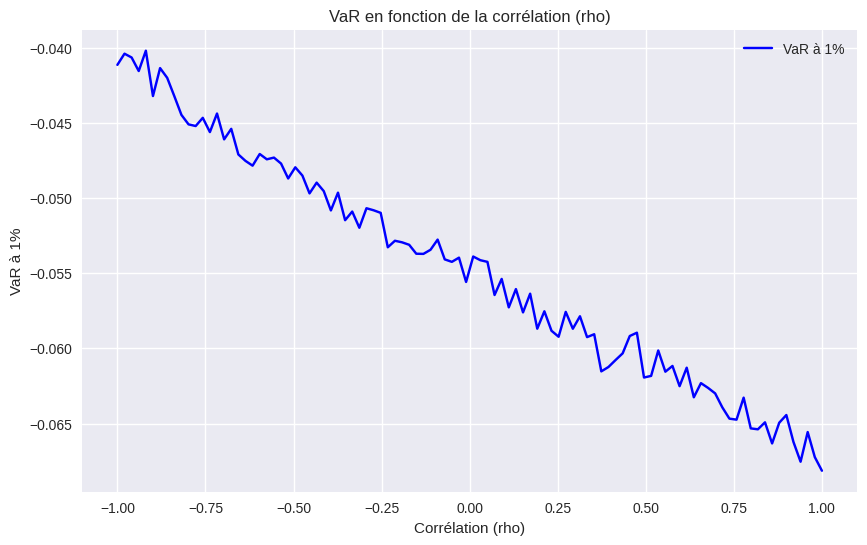

In [36]:
# Plage de valeurs pour rho
rho_values = np.linspace(-1, 1, 100)  # 100 valeurs entre -1 et 1

# Calcul de la VaR pour chaque valeur de rho
VaR_values = [VaRMC(r, lambda_, R, T_list, c, sigma, alpha, rho, h) for rho in rho_values]

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(rho_values, VaR_values, label="VaR à 1%", color="blue")
plt.xlabel("Corrélation (rho)")
plt.ylabel("VaR à 1%")
plt.title("VaR en fonction de la corrélation (rho)")
plt.grid(True)
plt.legend()
plt.show()

La VaR diminue à mesure que la corrélation augmente. Lorsque la corrélation est positive et proche de 1, une hausse des taux d'intérêt a un impact négatif plus marqué, car elle s'accompagne simultanément d'une augmentation des spreads de crédit. Cette double pression accroît le risque de défaut et conduit à un scénario plus défavorable pour la VaR, reflétant une exposition accrue aux chocs adverses.

À l'inverse, lorsque la corrélation est proche de -1, une hausse des taux d'intérêt est partiellement compensée par une baisse des spreads de crédit, et vice versa. Cette compensation atténue l'impact global sur le risque, réduisant ainsi la sévérité des scénarios adverses capturés par la VaR.

C'est la corrélation des facteurs de risque.